# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Importing Data-sets

In [2]:
main_walmart_data= pd.read_excel("Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx", sheet_name= 'Sheet1', parse_dates=['Date'] )
main_walmart_data.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      A  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      B     Yangon        Member    Male   
4  373-73-7910      C     Yangon        Normal    Male   

             Product line  Unit price  Quantity       Date      Time  \
0       Health and beauty       74.69         7 2019-01-05  13:08:00   
1  Electronic accessories       15.28         5 2019-03-08  10:29:00   
2      Home and lifestyle       46.33         7 2019-03-03  13:23:00   
3       Health and beauty       58.22         8 2019-01-27  20:33:00   
4       Sports and travel       86.31         7 2019-02-08  10:37:00   

       Payment  Rating  
0      Ewallet     9.1  
1         Cash     9.6  
2  Credit card     7.4  
3      Ewallet     8.4  
4      Ewallet     5.3

# Data Wrangling

In [3]:
main_walmart_data['Month_name']= main_walmart_data['Date'].dt.month_name() ## will give the MONTH names from the date and will make a diff column.
main_walmart_data.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      A  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      B     Yangon        Member    Male   
4  373-73-7910      C     Yangon        Normal    Male   

             Product line  Unit price  Quantity       Date      Time  \
0       Health and beauty       74.69         7 2019-01-05  13:08:00   
1  Electronic accessories       15.28         5 2019-03-08  10:29:00   
2      Home and lifestyle       46.33         7 2019-03-03  13:23:00   
3       Health and beauty       58.22         8 2019-01-27  20:33:00   
4       Sports and travel       86.31         7 2019-02-08  10:37:00   

       Payment  Rating Month_name  
0      Ewallet     9.1    January  
1         Cash     9.6      March  
2  Credit card     7.4      March  
3      Ewallet     8.4    January  
4      Ewallet     5.3   February

In [4]:
main_walmart_data['Month_name'].unique()

array(['January', 'March', 'February'], dtype=object)

In [5]:
## Using the FORMULA=>> { Revenue = Quantity Sold × Unit Price } to get the total revenue earned by selling each product.

def rev(dataframe_1,dataframe_2):
    return dataframe_1*dataframe_2     

In [6]:
main_walmart_data['Total_revenue']= rev(main_walmart_data['Unit price'], main_walmart_data['Quantity'])
main_walmart_data.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      A  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      B     Yangon        Member    Male   
4  373-73-7910      C     Yangon        Normal    Male   

             Product line  Unit price  Quantity       Date      Time  \
0       Health and beauty       74.69         7 2019-01-05  13:08:00   
1  Electronic accessories       15.28         5 2019-03-08  10:29:00   
2      Home and lifestyle       46.33         7 2019-03-03  13:23:00   
3       Health and beauty       58.22         8 2019-01-27  20:33:00   
4       Sports and travel       86.31         7 2019-02-08  10:37:00   

       Payment  Rating Month_name  Total_revenue  
0      Ewallet     9.1    January         522.83  
1         Cash     9.6      March          76.40  
2  Credit card     7.4      March         324.31  
3      Ewallet     8.4    January         465.76  
4      Ewallet     5.3   February         604.17

In [7]:
main_walmart_data.describe(include='all')

Invoice ID Branch    City Customer type  Gender         Product line  \
count          1000   1000    1000          1000    1000                 1000   
unique         1000      3       3             2       2                    6   
top     750-67-8428      A  Yangon        Member  Female  Fashion accessories   
freq              1    343     340           501     501                  178   
mean            NaN    NaN     NaN           NaN     NaN                  NaN   
min             NaN    NaN     NaN           NaN     NaN                  NaN   
25%             NaN    NaN     NaN           NaN     NaN                  NaN   
50%             NaN    NaN     NaN           NaN     NaN                  NaN   
75%             NaN    NaN     NaN           NaN     NaN                  NaN   
max             NaN    NaN     NaN           NaN     NaN                  NaN   
std             NaN    NaN     NaN           NaN     NaN                  NaN   

         Unit price     Quantity                        Date      Time  \
count   1000.000000  1000.000000                        1000      1000   
unique          NaN          NaN                         NaN       506   
top             NaN          NaN                         NaN  19:48:00   
freq            NaN          NaN                         NaN         7   
mean      55.672130     5.510000  2019-02-14 00:05:45.600000       NaN   
min       10.080000     1.000000         2019-01-01 00:00:00       NaN   
25%       32.875000     3.000000         2019-01-24 00:00:00       NaN   
50%       55.230000     5.000000         2019-02-13 00:00:00       NaN   
75%       77.935000     8.000000         2019-03-08 00:00:00       NaN   
max       99.960000    10.000000         2019-03-30 00:00:00       NaN   
std       26.494628     2.923431                         NaN       NaN   

        Payment      Rating Month_name  Total_revenue  
count      1000  1000.00000       1000     1000.00000  
unique        3         NaN          3            NaN  
top     Ewallet         NaN    January            NaN  
freq        345         NaN        352            NaN  
mean        NaN     6.97270        NaN      307.58738  
min         NaN     4.00000        NaN       10.17000  
25%         NaN     5.50000        NaN      118.49750  
50%         NaN     7.00000        NaN      241.76000  
75%         NaN     8.50000        NaN      448.90500  
max         NaN    10.00000        NaN      993.00000  
std         NaN     1.71858        NaN      234.17651

In [8]:
main_walmart_data.dtypes

Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Date             datetime64[ns]
Time                     object
Payment                  object
Rating                  float64
Month_name               object
Total_revenue           float64
dtype: object

# Grouping of City

In [9]:
grouping_by_CITY_BRANCH= main_walmart_data.groupby('City')
grouping_by_CITY_BRANCH

# Analysis

## Q1> Analyze the performance of sales and revenue at the city and branch level

### Class to perform analysis

In [10]:
class City_Data:
    def __init__(self,dataframe): ## Takes in the Dataframe (get_group() dataframe)
        self.dataframe=dataframe 
        
    def describe(self): ## Describes the DataFrame
        return self.dataframe.describe() 
        
    def branch_wise_Gender_count(self): ## GROUPING by "Branch" and "Gender" to find out which Gender visited the most in each Branch
        gender_branch_wise= self.dataframe.groupby(["Branch",'Gender'])['Gender'].value_counts().reset_index(name='Count_of_gender')
        return gender_branch_wise
        
    def city_branch_wise_total_quantity_sold(self): ## GROUPING the city dataframe by "Product Line" & "Branch" and adding the "Quantity" to get the Total quantity of Products sold by each BRANCH in the particular city.
        grouping_product_line_and_adding_Quantity= self.dataframe.groupby(["Product line",'Branch'])['Quantity'].sum().reset_index(name='Total_Quantity_Sold')
        return grouping_product_line_and_adding_Quantity
        
    def city_branch_wise_total_revenue_for_each_product(self): ## GROUPING the city dataframe by "Product Line" & "Branch" and adding the "Total_revenue" to get the sum of Total_Revenue of each product sold by different BRANCH,
        grouping_product_line_and_adding_total_rev= self.dataframe.groupby(["Product line",'Branch'])['Total_revenue'].sum().reset_index(name='Sum_Total_Revenue')
        return grouping_product_line_and_adding_total_rev
        
    def city_branch_wise_most_selling_month(self): ## GROUPING the city dataframe by "Product Line" and 'Month_name' to find out which month was the most selling month.
        grouping_product_line_and_month_name= self.dataframe.groupby(["Product line","Month_name"])['Quantity'].sum().reset_index(name='month_total_sale')
        return grouping_product_line_and_month_name
        
    def city_branch_monthly_revenue(self): ## GROUPING the city dataframe by "Branch" and "Month_name" and adding "Total_revenue" to  find out which month collected the most revenue.
        monthly_wise_rev= self.dataframe.groupby(['Product line', 'Month_name'])['Total_revenue'].sum().reset_index(name='Sum_Total_Rev')
        return monthly_wise_rev
        
    def city_branch_wise_most_performing_gender(self): ## GROUPING the city dataframe by "Gender", 'Month_name' & 'Branch' and adding "Quantity" to find out which Gender purchased the most items in a monthly basis. 
        grouping_gender_and_branch= self.dataframe.groupby(['Gender','Month_name','Branch'])['Quantity'].sum().reset_index(name='Gender_total_quantity_sold')
        return grouping_gender_and_branch
        
    def monthly_Gender_wise_total_QUANTITY_sold(self): ## GROUPING the "Product line","Month_name", "Gender" and adding the "Quantity" to find out which Gender purchsed the most number of products in a Month.
        monthly_grouping_gender_wise_total_quantity_sold= self.dataframe.groupby(["Product line",'Month_name',"Gender"])['Quantity'].sum().reset_index(name='Total_Quantity_Sold')
        return monthly_grouping_gender_wise_total_quantity_sold
        
    def city_Payment_method(self): ## GROUPING the 'Month_name' and 'Payment' and calculating the value_counts of the Payment to find out the number of times different payments took place in each month.
        Payment_method_made= self.dataframe.groupby(["Month_name",'Payment'])["Payment"].value_counts().reset_index(name='Payment_count')
        return Payment_method_made
        
    def customer_generated_most_rev(self): ## GROUPING the 'Customer type' & 'Branch' and adding the "Total_Revenue" to find out which type of CUSTOMERS helped generate the most revenue in which Branch. 
        customer_generate_most_rev= self.dataframe.groupby(['Customer type', 'Branch'])['Total_revenue'].sum().reset_index(name='Total_Amount')
        return customer_generate_most_rev        
        

# Mandalay

In [11]:
Mandalay_data= grouping_by_CITY_BRANCH.get_group("Mandalay")
Mandalay_data.head(5)

Invoice ID Branch      City Customer type  Gender  \
9   692-92-5582      A  Mandalay        Member  Female   
10  351-62-0822      B  Mandalay        Member  Female   
11  529-56-3974      C  Mandalay        Member    Male   
15  299-46-1805      A  Mandalay        Member  Female   
19  319-50-3348      B  Mandalay        Normal  Female   

              Product line  Unit price  Quantity       Date      Time  \
9       Food and beverages       54.84         3 2019-02-20  13:27:00   
10     Fashion accessories       14.48         4 2019-02-06  18:07:00   
11  Electronic accessories       25.51         4 2019-03-09  17:03:00   
15       Sports and travel       93.72         6 2019-01-15  16:19:00   
19      Home and lifestyle       40.30         2 2019-03-11  15:30:00   

        Payment  Rating Month_name  Total_revenue  
9   Credit card     5.9   February         164.52  
10      Ewallet     4.5   February          57.92  
11         Cash     6.8      March         102.04  
15         Cash     4.5    January         562.32  
19      Ewallet     4.4      March          80.60

In [12]:
Mandalay_func_data= City_Data(Mandalay_data)
Mandalay_func_data

### Gender wise Customers visited the stores in Mandalay

In [13]:
Mandalay_gender_count=Mandalay_func_data.branch_wise_Gender_count()
Mandalay_gender_count

Branch  Gender  Count_of_gender
0      A  Female               58
1      A    Male               61
2      B  Female               61
3      B    Male               57
4      C  Female               43
5      C    Male               52

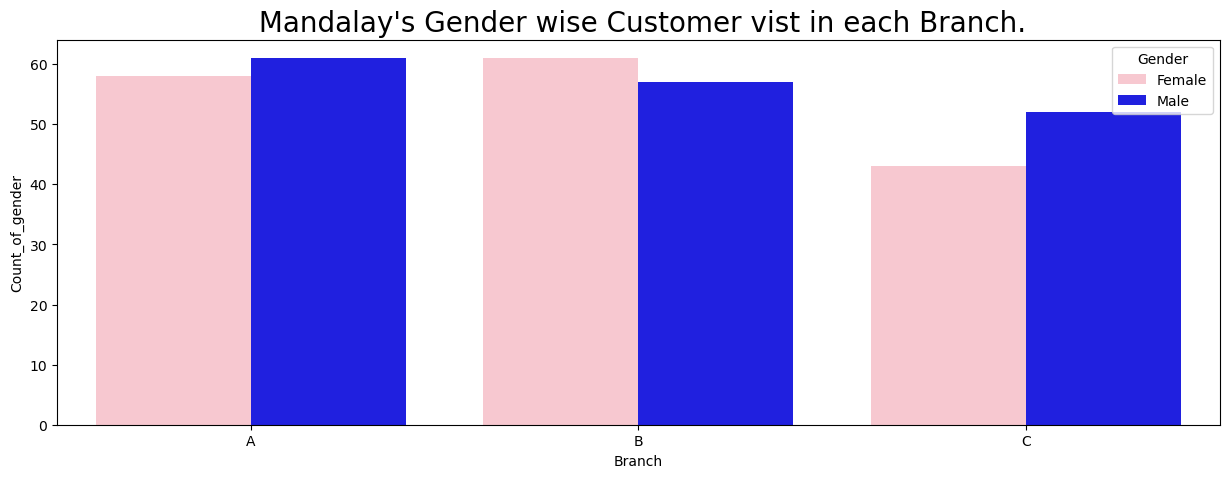

In [14]:
plt.figure(figsize=(15,5))
plt.title(" Mandalay's Gender wise Customer vist in each Branch.", fontsize=20)
gender_count_of_Mandalay= sns.barplot(data=Mandalay_gender_count, x= Mandalay_gender_count['Branch'], y=Mandalay_gender_count['Count_of_gender'], hue= Mandalay_gender_count['Gender'], palette=['Pink','Blue'])

### Mandalay's branch wise Total Quantity of different products sold. 

In [15]:
Mandalay_total_quantity_sold= Mandalay_func_data.city_branch_wise_total_quantity_sold()
Mandalay_total_quantity_sold

Product line Branch  Total_Quantity_Sold
0   Electronic accessories      A                  107
1   Electronic accessories      B                  136
2   Electronic accessories      C                   73
3      Fashion accessories      A                  124
4      Fashion accessories      B                   74
5      Fashion accessories      C                   99
6       Food and beverages      A                  104
7       Food and beverages      B                   98
8       Food and beverages      C                   68
9        Health and beauty      A                   83
10       Health and beauty      B                  113
11       Health and beauty      C                  124
12      Home and lifestyle      A                  118
13      Home and lifestyle      B                  102
14      Home and lifestyle      C                   75
15       Sports and travel      A                  101
16       Sports and travel      B                  141
17       Sports and travel      C                   80

In [16]:
## We are PIVOTING the dataframe so that we can create the Pie-Chart according to the Branchs.

PIVOTING_Mandalay_total_quantity_sold= Mandalay_total_quantity_sold.pivot(index='Branch',columns='Product line', values='Total_Quantity_Sold')
PIVOTING_Mandalay_total_quantity_sold

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                                107                  124                 104   
B                                136                   74                  98   
C                                 73                   99                  68   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                            83                 118                101  
B                           113                 102                141  
C                           124                  75                 80

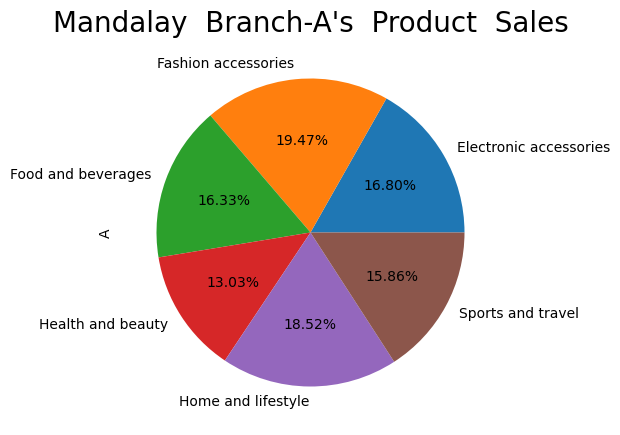

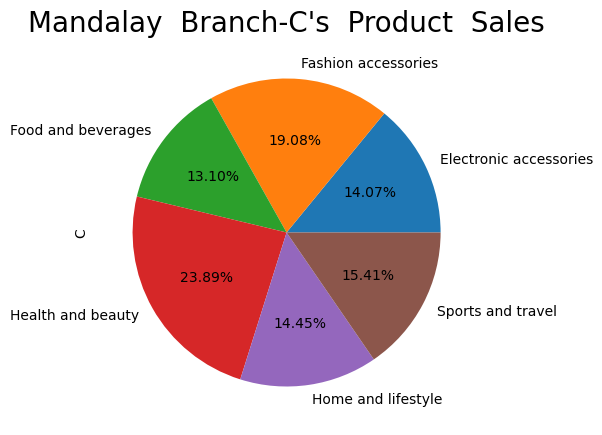

In [17]:
## How is it calculating the %age?  { Total Electronic's sold by BRANCH "A" / Total number of different goods sold by BRANCH "A" * 100 }, which is ,
## 107/637 *100

for branch in PIVOTING_Mandalay_total_quantity_sold.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Mandalay  Branch-{branch}'s  Product  Sales", fontsize=20)
    pie_chart= PIVOTING_Mandalay_total_quantity_sold.loc[branch].plot(kind='pie', autopct='%1.2f%%')
    plt.show()

### Mandalay's Branch wise Total Revenue generated by selling different products.

In [18]:
Mandalay_total_revenue_for_each_product= Mandalay_func_data.city_branch_wise_total_revenue_for_each_product()
Mandalay_total_revenue_for_each_product

Product line Branch  Sum_Total_Revenue
0   Electronic accessories      A            4441.26
1   Electronic accessories      B            7714.54
2   Electronic accessories      C            4083.67
3      Fashion accessories      A            6557.90
4      Fashion accessories      B            3724.56
5      Fashion accessories      C            5349.27
6       Food and beverages      A            5298.58
7       Food and beverages      B            5067.14
8       Food and beverages      C            4124.65
9        Health and beauty      A            5484.68
10       Health and beauty      B            6252.01
11       Health and beauty      C            7292.51
12      Home and lifestyle      A            7043.61
13      Home and lifestyle      B            5902.78
14      Home and lifestyle      C            3767.10
15       Sports and travel      A            5304.06
16       Sports and travel      B            8554.90
17       Sports and travel      C            5177.42

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to p

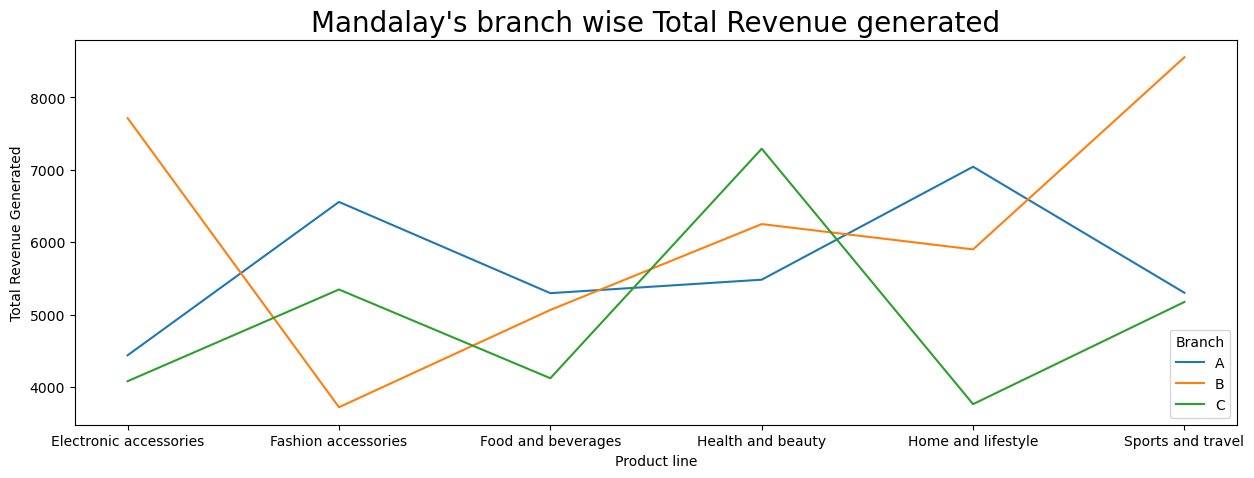

In [19]:
plt.figure(figsize=(15,5))
plt.title("Mandalay's branch wise Total Revenue generated", fontsize=20)
total_revenue= sns.lineplot(data=Mandalay_total_revenue_for_each_product, x=Mandalay_total_revenue_for_each_product['Product line'], y= Mandalay_total_revenue_for_each_product['Sum_Total_Revenue'], hue=Mandalay_total_revenue_for_each_product['Branch'])
plt.ylabel('Total Revenue Generated')
plt.show()

### Mandalay's most selling month product wise.

In [20]:
Mandalay_most_selling_month= Mandalay_func_data.city_branch_wise_most_selling_month()
Mandalay_most_selling_month

Product line Month_name  month_total_sale
0   Electronic accessories   February               118
1   Electronic accessories    January               119
2   Electronic accessories      March                79
3      Fashion accessories   February               118
4      Fashion accessories    January               103
5      Fashion accessories      March                76
6       Food and beverages   February               107
7       Food and beverages    January               102
8       Food and beverages      March                61
9        Health and beauty   February               102
10       Health and beauty    January                91
11       Health and beauty      March               127
12      Home and lifestyle   February                83
13      Home and lifestyle    January                73
14      Home and lifestyle      March               139
15       Sports and travel   February                96
16       Sports and travel    January               112
17       Sports and travel      March               114

In [21]:
PIVOTING_Mandalay_most_selling_month= Mandalay_most_selling_month.pivot(index='Month_name',columns='Product line', values='month_total_sale')
PIVOTING_Mandalay_most_selling_month

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Month_name                                                                      
February                         118                  118                 107   
January                          119                  103                 102   
March                             79                   76                  61   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Month_name                                                              
February                    102                  83                 96  
January                      91                  73                112  
March                       127                 139                114

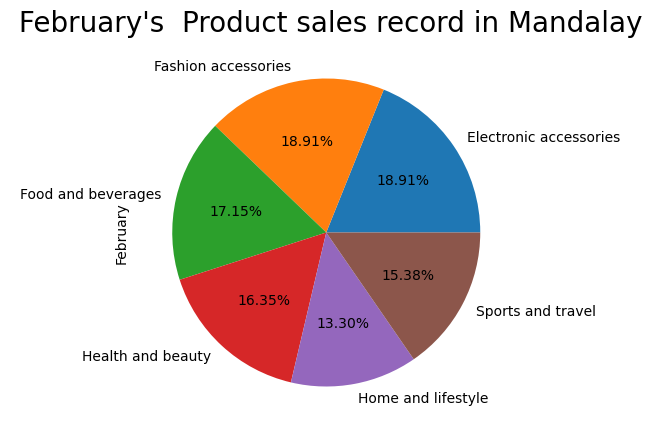

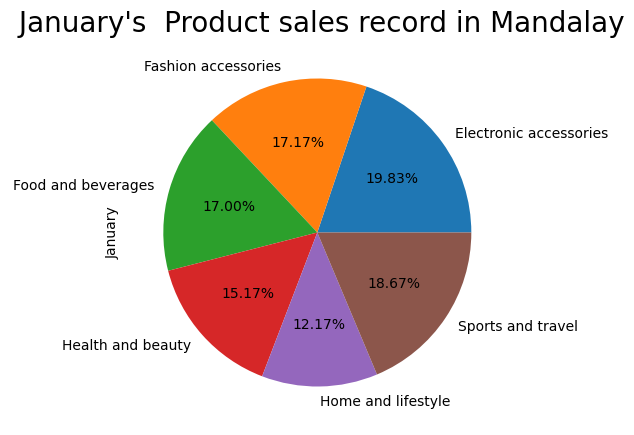

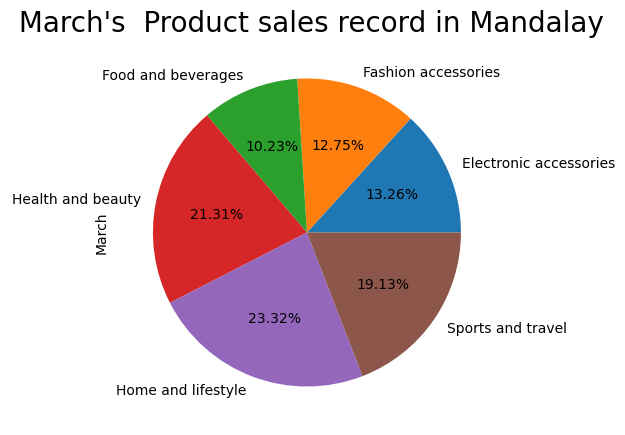

In [22]:
for month in PIVOTING_Mandalay_most_selling_month.index:
    plt.figure(figsize=(5,5))
    plt.title(f" {month}'s  Product sales record in Mandalay",fontsize=20)    
    monthly_pie= PIVOTING_Mandalay_most_selling_month.loc[month].plot(kind='pie', autopct='%1.2f%%')

### Mandalay's Product wise monthly revenue collected

In [23]:
Mandalay_month_wise_rev= Mandalay_func_data.city_branch_monthly_revenue()
Mandalay_month_wise_rev

Product line Month_name  Sum_Total_Rev
0   Electronic accessories   February        6367.86
1   Electronic accessories    January        6380.74
2   Electronic accessories      March        3490.87
3      Fashion accessories   February        5844.87
4      Fashion accessories    January        5821.52
5      Fashion accessories      March        3965.34
6       Food and beverages   February        5290.30
7       Food and beverages    January        6294.55
8       Food and beverages      March        2905.52
9        Health and beauty   February        5577.55
10       Health and beauty    January        6095.13
11       Health and beauty      March        7356.52
12      Home and lifestyle   February        4437.95
13      Home and lifestyle    January        4368.04
14      Home and lifestyle      March        7907.50
15       Sports and travel   February        5266.49
16       Sports and travel    January        6445.79
17       Sports and travel      March        7324.10

In [24]:
PIVOTING_Mandalay_month_wise_rev=Mandalay_month_wise_rev.pivot(index='Month_name', columns='Product line', values='Sum_Total_Rev')
PIVOTING_Mandalay_month_wise_rev

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Month_name                                                                      
February                     6367.86              5844.87             5290.30   
January                      6380.74              5821.52             6294.55   
March                        3490.87              3965.34             2905.52   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Month_name                                                              
February                5577.55             4437.95            5266.49  
January                 6095.13             4368.04            6445.79  
March                   7356.52             7907.50            7324.10

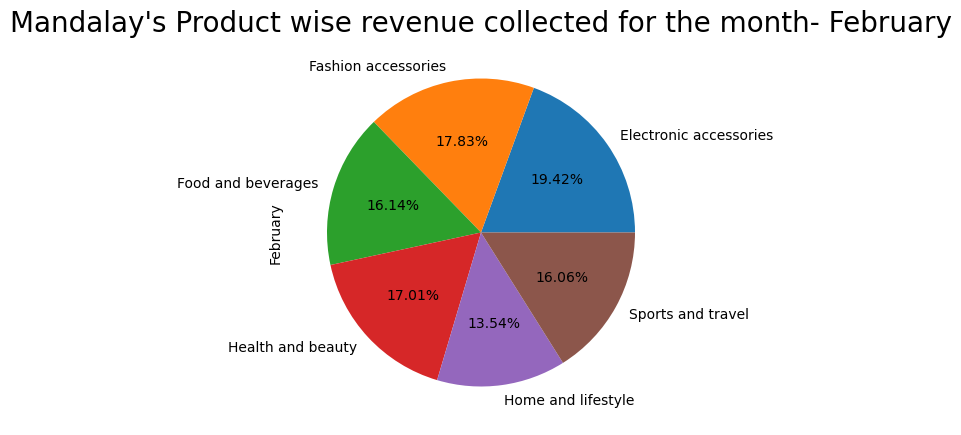

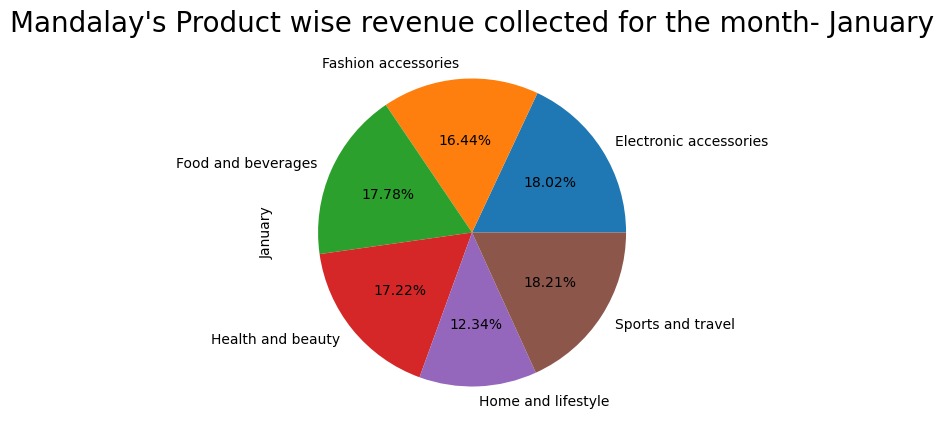

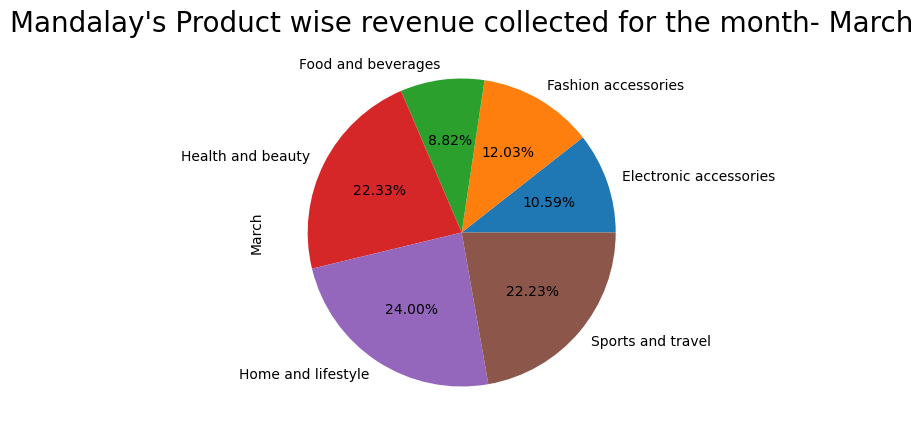

In [25]:
for month in PIVOTING_Mandalay_month_wise_rev.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Mandalay's Product wise revenue collected for the month- {month}",fontsize=20)
    pie_month_rev_Mandalay= PIVOTING_Mandalay_month_wise_rev.loc[month].plot(kind='pie', autopct='%1.2f%%')
    plt.show()

### Gender who Purchased the most from the Branchs of Mandalay in monthly basis

In [26]:
Mandalay_most_performing_gender= Mandalay_func_data.city_branch_wise_most_performing_gender()
Mandalay_most_performing_gender

Gender Month_name Branch  Gender_total_quantity_sold
0   Female   February      A                         130
1   Female   February      B                         163
2   Female   February      C                          53
3   Female    January      A                         117
4   Female    January      B                         110
5   Female    January      C                          82
6   Female      March      A                          87
7   Female      March      B                          81
8   Female      March      C                          88
9     Male   February      A                          79
10    Male   February      B                          99
11    Male   February      C                         100
12    Male    January      A                         118
13    Male    January      B                         107
14    Male    January      C                          66
15    Male      March      A                         106
16    Male      March      B                         104
17    Male      March      C                         130

In [27]:
PIVOTING_Mandalay_most_performing_gender= Mandalay_most_performing_gender.pivot(index='Month_name', columns=['Gender','Branch'],values='Gender_total_quantity_sold')
PIVOTING_Mandalay_most_performing_gender

Gender     Female          Male          
Branch          A    B   C    A    B    C
Month_name                               
February      130  163  53   79   99  100
January       117  110  82  118  107   66
March          87   81  88  106  104  130

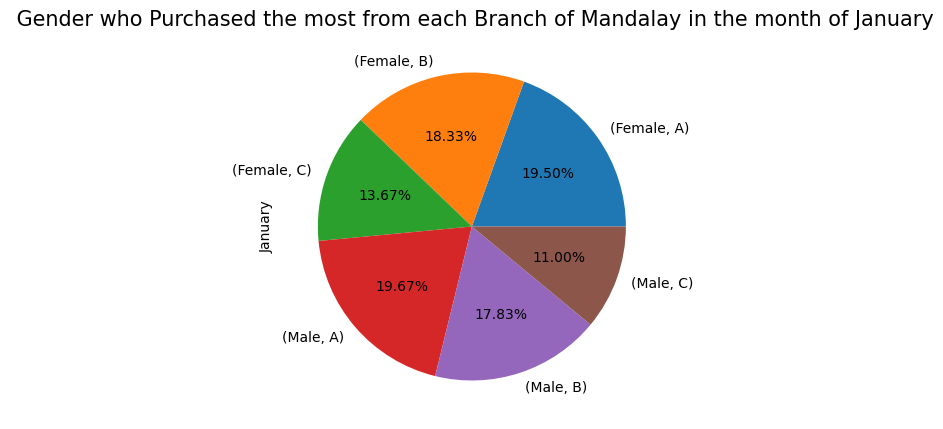

In [28]:
for month in PIVOTING_Mandalay_most_performing_gender.index:
    plt.figure(figsize=(5,5))
    plt.title(f" Gender who Purchased the most from each Branch of Mandalay in the month of {month}", fontsize=15)
    best_pie= PIVOTING_Mandalay_most_performing_gender.loc[month].plot(kind='pie',autopct='%1.2f%%')
    

### Gender wise who Purchased the most number of items in a month in Mandalay

In [29]:
Total_Quantity_sold_Mandalay_gender= Mandalay_func_data.monthly_Gender_wise_total_QUANTITY_sold()
Total_Quantity_sold_Mandalay_gender

Product line Month_name  Gender  Total_Quantity_Sold
0   Electronic accessories   February  Female                   69
1   Electronic accessories   February    Male                   49
2   Electronic accessories    January  Female                   44
3   Electronic accessories    January    Male                   75
4   Electronic accessories      March  Female                   43
5   Electronic accessories      March    Male                   36
6      Fashion accessories   February  Female                   74
7      Fashion accessories   February    Male                   44
8      Fashion accessories    January  Female                   61
9      Fashion accessories    January    Male                   42
10     Fashion accessories      March  Female                   42
11     Fashion accessories      March    Male                   34
12      Food and beverages   February  Female                   66
13      Food and beverages   February    Male                   41
14      Food and beverages    January  Female                   68
15      Food and beverages    January    Male                   34
16      Food and beverages      March  Female                   35
17      Food and beverages      March    Male                   26
18       Health and beauty   February  Female                   53
19       Health and beauty   February    Male                   49
20       Health and beauty    January  Female                   30
21       Health and beauty    January    Male                   61
22       Health and beauty      March  Female                   29
23       Health and beauty      March    Male                   98
24      Home and lifestyle   February  Female                   23
25      Home and lifestyle   February    Male                   60
26      Home and lifestyle    January  Female                   55
27      Home and lifestyle    January    Male                   18
28      Home and lifestyle      March  Female                   69
29      Home and lifestyle      March    Male                   70
30       Sports and travel   February  Female                   61
31       Sports and travel   February    Male                   35
32       Sports and travel    January  Female                   51
33       Sports and travel    January    Male                   61
34       Sports and travel      March  Female                   38
35       Sports and travel      March    Male                   76

In [30]:
PIVOTING_Total_Quantity_sold_Mandalay_gender=Total_Quantity_sold_Mandalay_gender.pivot(index='Month_name', columns=['Product line','Gender'],values='Total_Quantity_Sold')
PIVOTING_Total_Quantity_sold_Mandalay_gender

Product line Electronic accessories      Fashion accessories       \
Gender                       Female Male              Female Male   
Month_name                                                          
February                         69   49                  74   44   
January                          44   75                  61   42   
March                            43   36                  42   34   

Product line Food and beverages      Health and beauty       \
Gender                   Female Male            Female Male   
Month_name                                                    
February                     66   41                53   49   
January                      68   34                30   61   
March                        35   26                29   98   

Product line Home and lifestyle      Sports and travel       
Gender                   Female Male            Female Male  
Month_name                                                   
February                     23   60                61   35  
January                      55   18                51   61  
March                        69   70                38   76

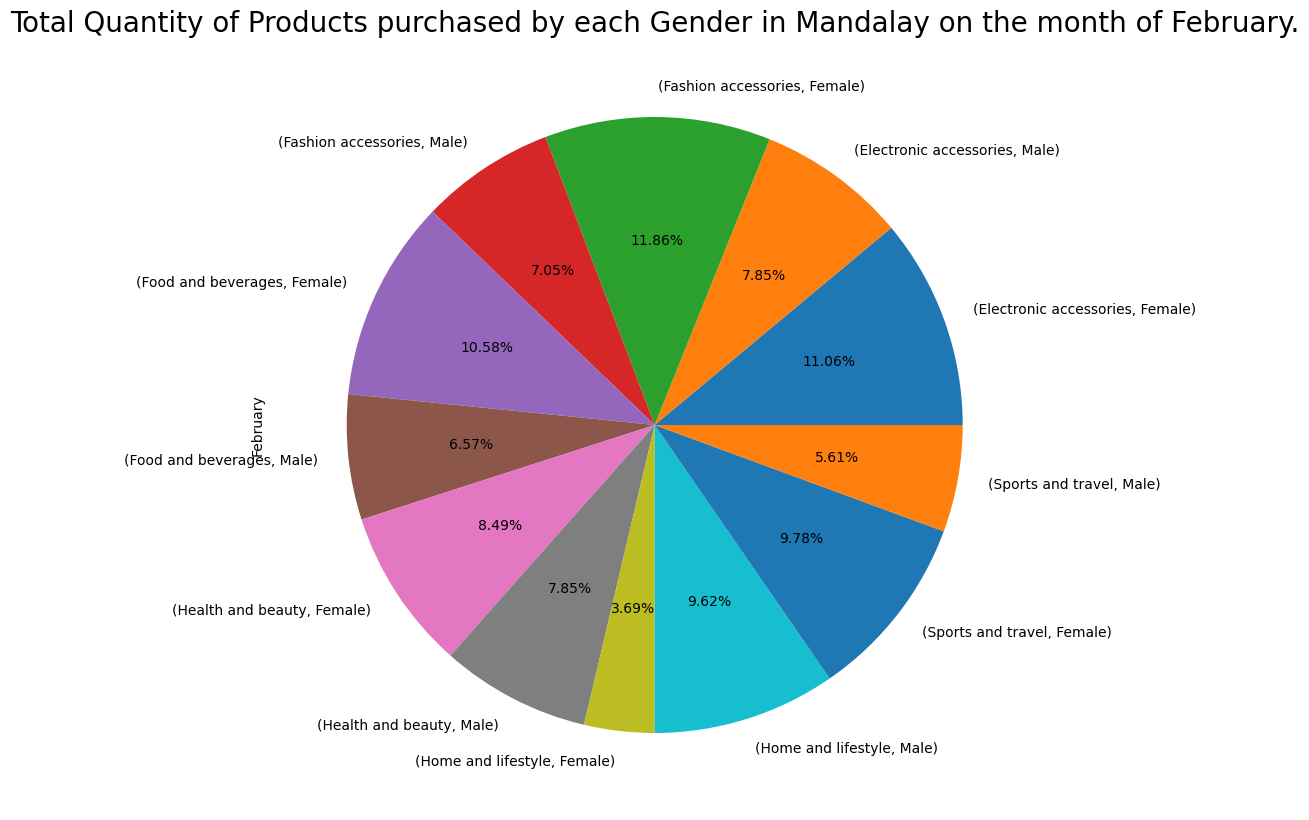

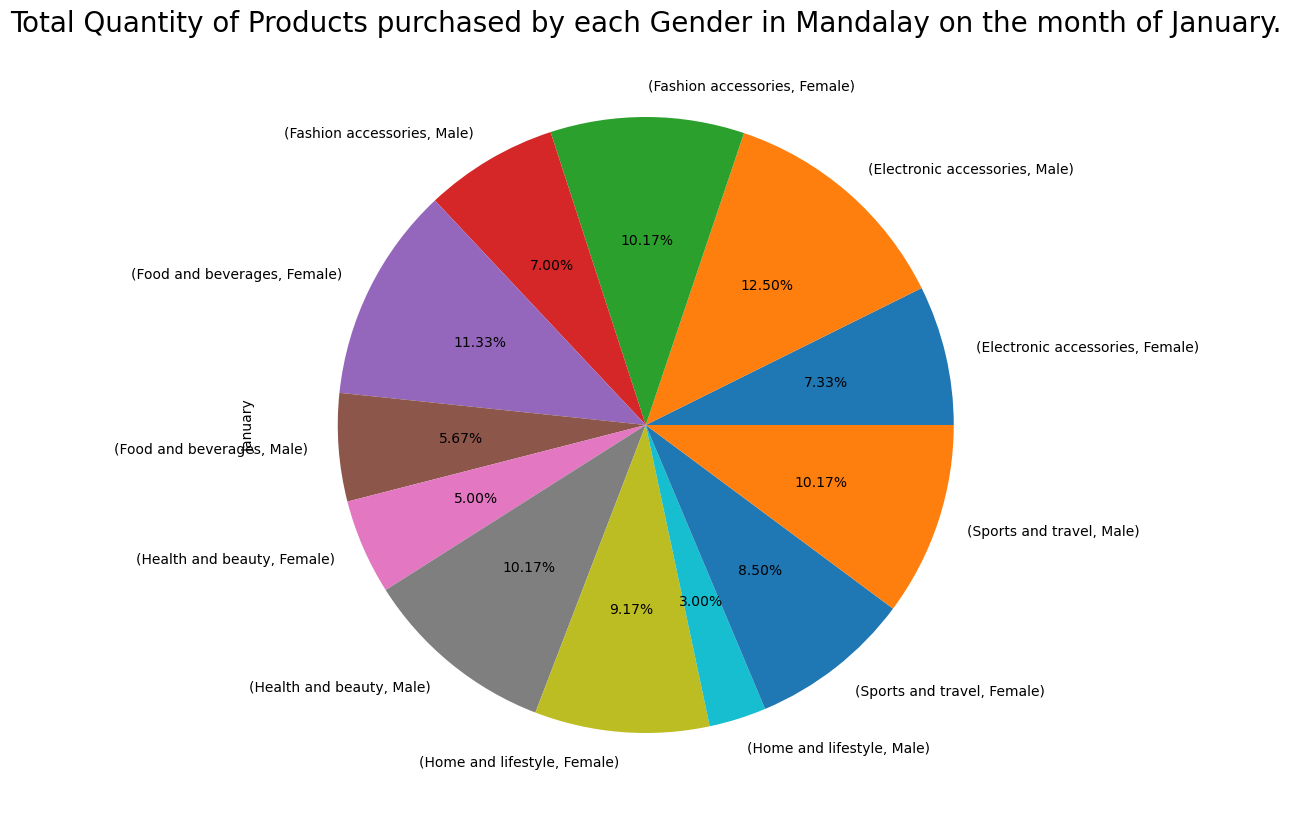

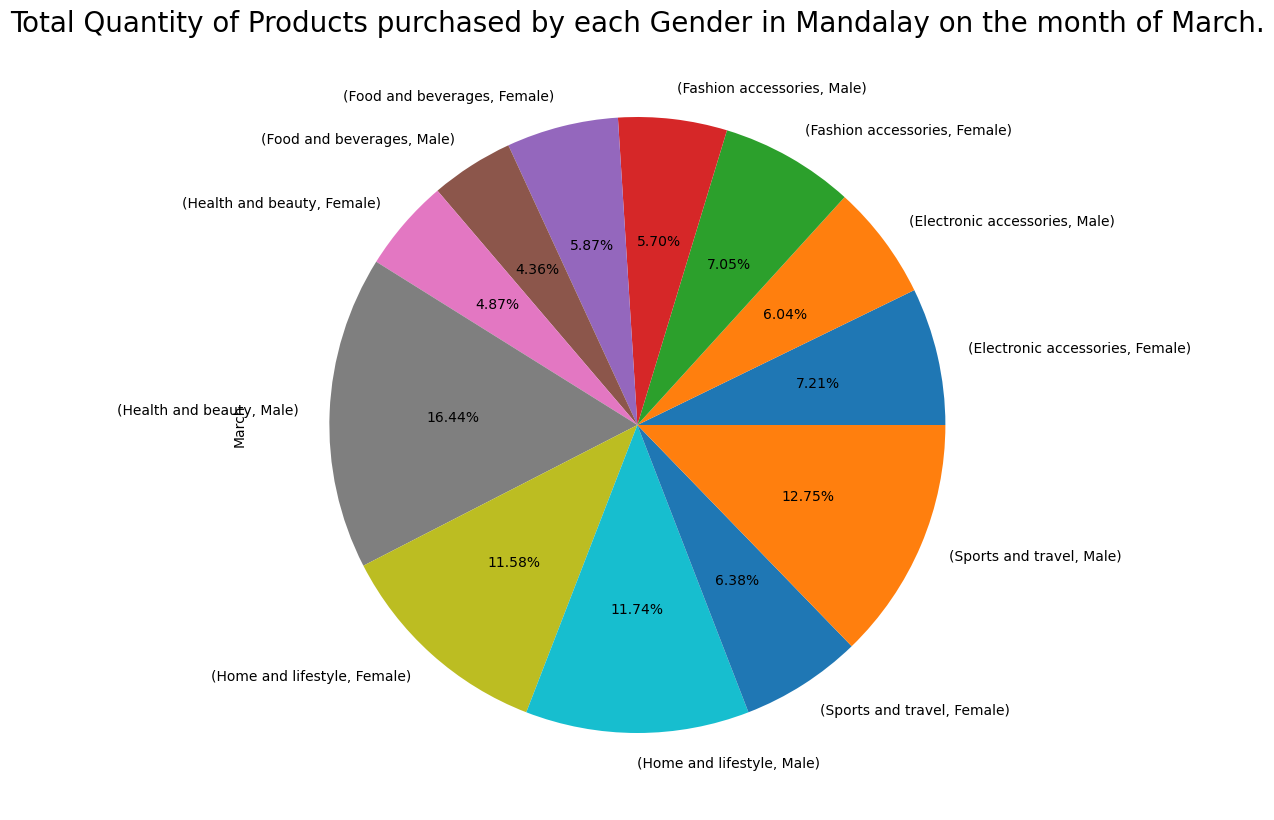

In [31]:
for month in PIVOTING_Total_Quantity_sold_Mandalay_gender.index:
    plt.figure(figsize=(15,10))
    plt.title(f"Total Quantity of Products purchased by each Gender in Mandalay on the month of {month}.", fontsize=20)    
    best_pie= PIVOTING_Total_Quantity_sold_Mandalay_gender.loc[month].plot(kind='pie',autopct='%1.2f%%')

### Mandalay's Payment Methods

In [32]:
Mandalay_Payment_method= Mandalay_func_data.city_Payment_method()
Mandalay_Payment_method

Month_name      Payment  Payment_count
0   February         Cash             44
1   February  Credit card             30
2   February      Ewallet             35
3    January         Cash             35
4    January  Credit card             44
5    January      Ewallet             32
6      March         Cash             31
7      March  Credit card             35
8      March      Ewallet             46

In [33]:
PIVOTING_Mandalay_Payment_method= Mandalay_Payment_method.pivot(index='Month_name',columns='Payment', values='Payment_count')
PIVOTING_Mandalay_Payment_method

Payment     Cash  Credit card  Ewallet
Month_name                            
February      44           30       35
January       35           44       32
March         31           35       46

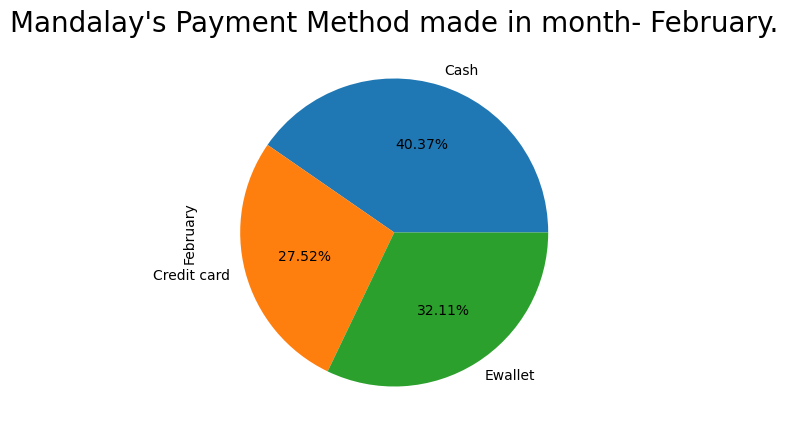

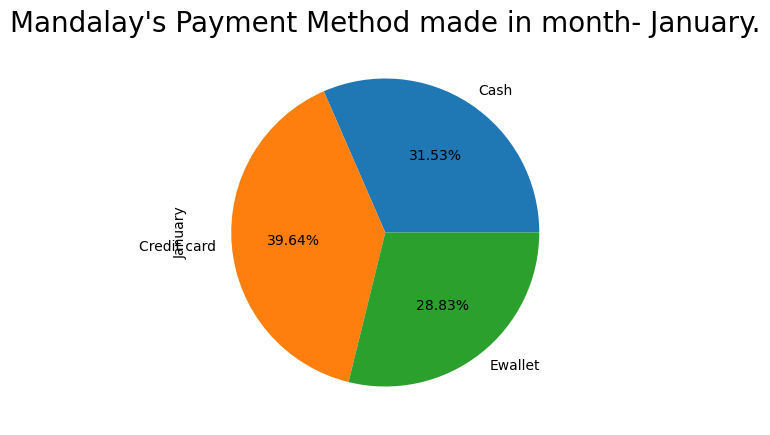

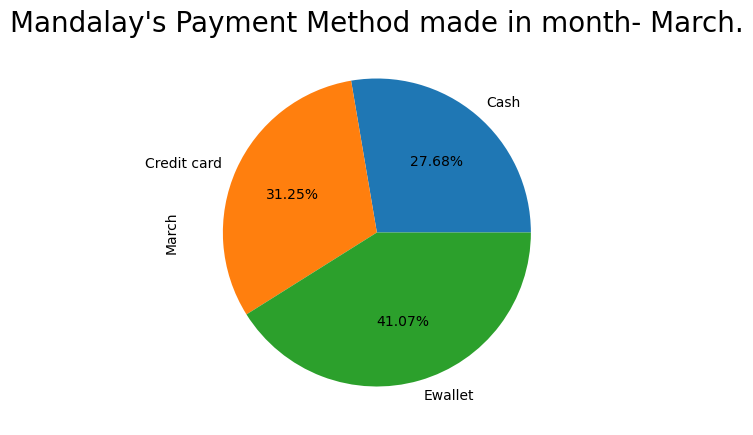

In [34]:
for month in PIVOTING_Mandalay_Payment_method.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Mandalay's Payment Method made in month- {month}.", fontsize=20)    
    best_pie= PIVOTING_Mandalay_Payment_method.loc[month].plot(kind='pie',autopct='%1.2f%%')

### Customers type generated the most Revenue in different branches in Mandalay

In [35]:
customer_generated_most_revenue_Mandalay= Mandalay_func_data.customer_generated_most_rev()
customer_generated_most_revenue_Mandalay

Customer type Branch  Total_Amount
0        Member      A      17646.77
1        Member      B      18582.26
2        Member      C      14918.29
3        Normal      A      16483.32
4        Normal      B      18633.67
5        Normal      C      14876.33

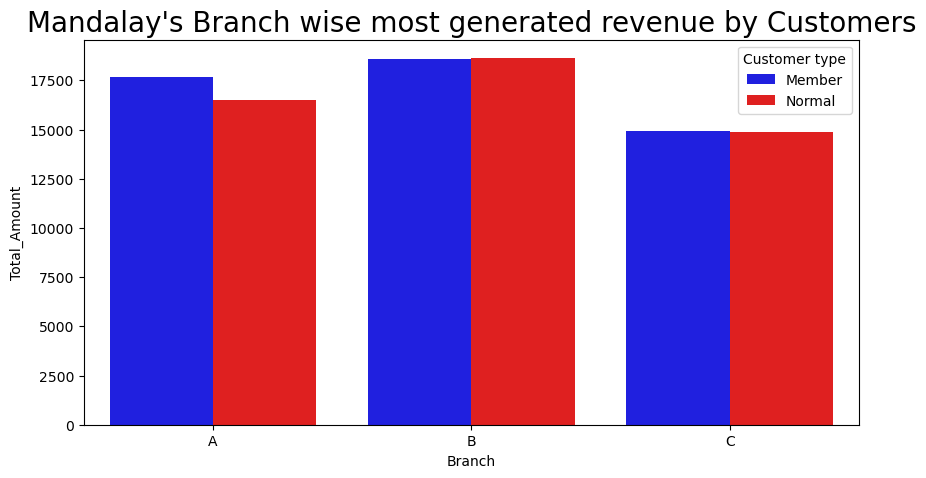

In [36]:
plt.figure(figsize=(10,5))
plt.title("Mandalay's Branch wise most generated revenue by Customers", fontsize=20)
customers=sns.barplot(data=customer_generated_most_revenue_Mandalay, x=customer_generated_most_revenue_Mandalay['Branch'],y=customer_generated_most_revenue_Mandalay["Total_Amount"],hue=customer_generated_most_revenue_Mandalay['Customer type'], palette=['Blue','Red'] )


After analysis the ***"Customers type generated the most Revenue in different branches"***, we can see that there is not much difference between the Normal Customer and Memeber Customer's Expenditure. To get to a conclusion about this we will use the T-Test testing.

<> Why T-Test? 

We are using **T-Test** because we are trying to determine whether there is a difference in revenue between the "Normal Customers" and "Member Customers". 
    We are NOT using the **Z-Test** because population standard deviation is unknown and for most real-world data, we don't know the population standard deviation. 


**NULL HYPOTHESIS**:- Normal and Member Customers made quite the same expenditure

**ALTERNATE HYPOTHESIS**:- Normal and Member Customers did not make the same expenditure

**CONFIDANCE INTERVAL**:- 0.95%

**SIGNIFICANCE INTERVAL**:- 0.05% (1-CI)0.05% (1-CI)

In [37]:
MEMBER_customer_generated_most_revenue= customer_generated_most_revenue_Mandalay[customer_generated_most_revenue_Mandalay['Customer type']=='Member']
MEMBER_customer_generated_most_revenue

Customer type Branch  Total_Amount
0        Member      A      17646.77
1        Member      B      18582.26
2        Member      C      14918.29

In [38]:
Normal_customer_generated_most_revenue=customer_generated_most_revenue_Mandalay[customer_generated_most_revenue_Mandalay['Customer type']=='Normal']
Normal_customer_generated_most_revenue

Customer type Branch  Total_Amount
3        Normal      A      16483.32
4        Normal      B      18633.67
5        Normal      C      14876.33

In [39]:
t_test,p_value= stats.ttest_ind(MEMBER_customer_generated_most_revenue['Total_Amount'],Normal_customer_generated_most_revenue['Total_Amount'])
print(f"T-Test:- {t_test}")
print(f"P-Value:- {p_value}")

T-Test:- 0.24868019679673
P-Value:- 0.815854423811656


Since, the P-value > SI, we  **FAIL TO REJECT** the **NULL HYPO**. Meaning, Normal and Member Customers made  quite the same expenditure. In short, the spending patterns of these two groups appear to be quite similar.

### Naypyitaw

In [40]:
Naypyitaw_data= grouping_by_CITY_BRANCH.get_group("Naypyitaw")
Naypyitaw_data.head(5)

Invoice ID Branch       City Customer type  Gender  \
1   226-31-3081      A  Naypyitaw        Normal  Female   
5   699-14-3026      B  Naypyitaw        Normal    Male   
7   315-22-5665      C  Naypyitaw        Normal  Female   
20  300-71-4605      A  Naypyitaw        Member    Male   
34  183-56-6882      B  Naypyitaw        Member  Female   

              Product line  Unit price  Quantity       Date      Time  \
1   Electronic accessories       15.28         5 2019-03-08  10:29:00   
5   Electronic accessories       85.39         7 2019-03-25  18:30:00   
7       Home and lifestyle       73.56        10 2019-02-24  11:38:00   
20  Electronic accessories       86.04         5 2019-02-25  11:24:00   
34      Food and beverages       99.42         4 2019-02-06  10:42:00   

    Payment  Rating Month_name  Total_revenue  
1      Cash     9.6      March          76.40  
5   Ewallet     4.1      March         597.73  
7   Ewallet     8.0   February         735.60  
20  Ewallet     4.8   February         430.20  
34  Ewallet     7.5   February         397.68

In [41]:
Naypyitaw_func_data= City_Data(Naypyitaw_data)
Naypyitaw_func_data

### Gender wise Customers visted the stores in Naypyitaw

In [42]:
Naypyitaw_gender_count= Naypyitaw_func_data.branch_wise_Gender_count()
Naypyitaw_gender_count

Branch  Gender  Count_of_gender
0      A  Female               54
1      A    Male               56
2      B  Female               62
3      B    Male               47
4      C  Female               62
5      C    Male               47

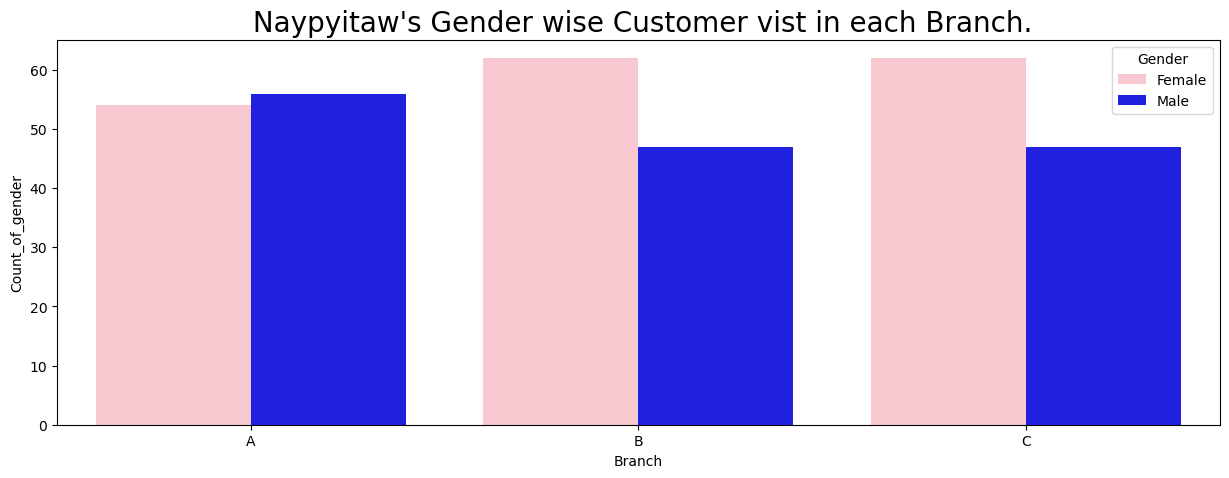

In [43]:
plt.figure(figsize=(15,5))
plt.title(" Naypyitaw's Gender wise Customer vist in each Branch.", fontsize=20)
gender_count_of_Naypyitaw= sns.barplot(data=Naypyitaw_gender_count, x= Naypyitaw_gender_count['Branch'], y=Naypyitaw_gender_count['Count_of_gender'], hue= Naypyitaw_gender_count['Gender'],palette=["Pink","Blue"])

### Naypyitaw's branch wise Total Quantity of different products sold.

In [44]:
Naypyitaw_total_quantity_sold= Naypyitaw_func_data.city_branch_wise_total_quantity_sold()
Naypyitaw_total_quantity_sold

Product line Branch  Total_Quantity_Sold
0   Electronic accessories      A                  117
1   Electronic accessories      B                  133
2   Electronic accessories      C                   83
3      Fashion accessories      A                  113
4      Fashion accessories      B                  132
5      Fashion accessories      C                   97
6       Food and beverages      A                  153
7       Food and beverages      B                   73
8       Food and beverages      C                  143
9        Health and beauty      A                  118
10       Health and beauty      B                   94
11       Health and beauty      C                   65
12      Home and lifestyle      A                   79
13      Home and lifestyle      B                   83
14      Home and lifestyle      C                   83
15       Sports and travel      A                   68
16       Sports and travel      B                   89
17       Sports and travel      C                  108

In [45]:
PIVOTING_Naypyitaw_total_quantity_sold= Naypyitaw_total_quantity_sold.pivot(index='Branch',columns='Product line', values='Total_Quantity_Sold')
PIVOTING_Naypyitaw_total_quantity_sold

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                                117                  113                 153   
B                                133                  132                  73   
C                                 83                   97                 143   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                           118                  79                 68  
B                            94                  83                 89  
C                            65                  83                108

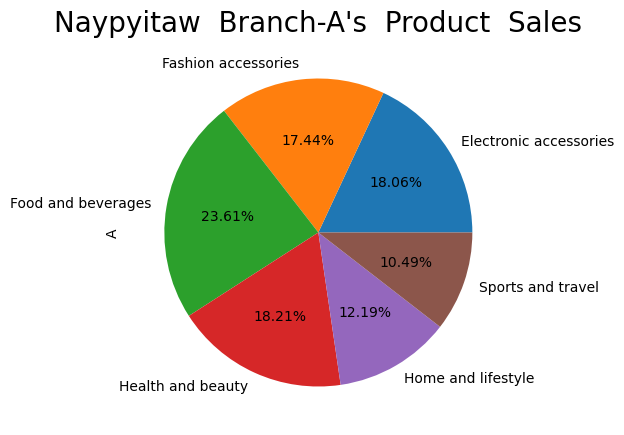

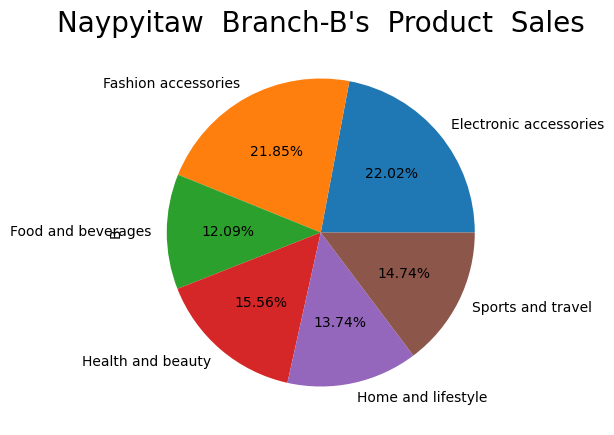

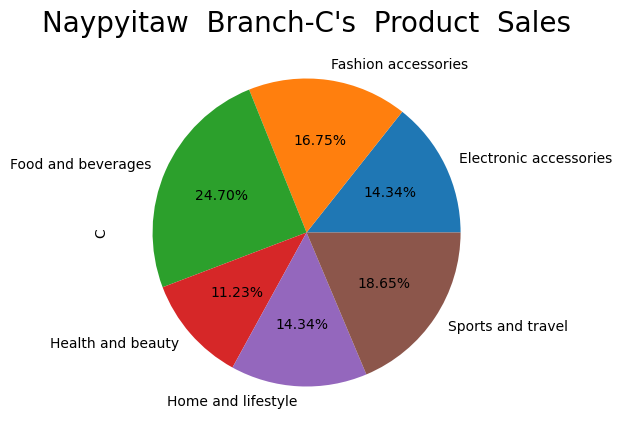

In [46]:
for branch in PIVOTING_Naypyitaw_total_quantity_sold.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Naypyitaw  Branch-{branch}'s  Product  Sales", fontsize=20)
    pie_chart= PIVOTING_Naypyitaw_total_quantity_sold.loc[branch].plot(kind='pie', autopct='%1.2f%%')
    plt.show()

### Naypyitaw's Branch wise Total Revenue generated by selling different products.

In [47]:
Naypyitaw_total_revenue_for_each_product= Naypyitaw_func_data.city_branch_wise_total_revenue_for_each_product()
Naypyitaw_total_revenue_for_each_product

Product line Branch  Sum_Total_Revenue
0   Electronic accessories      A            6646.99
1   Electronic accessories      B            6806.21
2   Electronic accessories      C            4612.49
3      Fashion accessories      A            5402.07
4      Fashion accessories      B            9198.72
5      Fashion accessories      C            5932.61
6       Food and beverages      A            9439.47
7       Food and beverages      B            4341.68
8       Food and beverages      C            8853.95
9        Health and beauty      A            6765.22
10       Health and beauty      B            5069.54
11       Health and beauty      C            3989.36
12      Home and lifestyle      A            4503.75
13      Home and lifestyle      B            4350.80
14      Home and lifestyle      C            4379.31
15       Sports and travel      A            3228.14
16       Sports and travel      B            5390.80
17       Sports and travel      C            6392.42

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to p

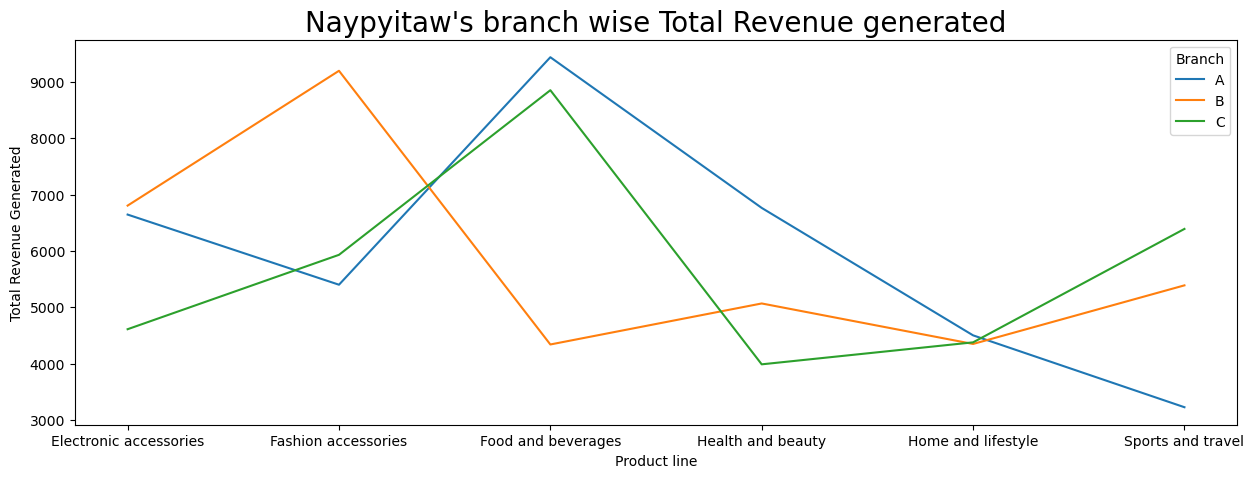

In [48]:
plt.figure(figsize=(15,5))
plt.title("Naypyitaw's branch wise Total Revenue generated", fontsize=20)
total_revenue= sns.lineplot(data=Naypyitaw_total_revenue_for_each_product, x=Naypyitaw_total_revenue_for_each_product['Product line'], y= Naypyitaw_total_revenue_for_each_product['Sum_Total_Revenue'], hue=Naypyitaw_total_revenue_for_each_product['Branch'])
plt.ylabel('Total Revenue Generated')
plt.show()

###  Naypyitaw's most selling month product wise.

In [49]:
Naypyitaw_most_selling_month= Naypyitaw_func_data.city_branch_wise_most_selling_month()
Naypyitaw_most_selling_month

Product line Month_name  month_total_sale
0   Electronic accessories   February               106
1   Electronic accessories    January                97
2   Electronic accessories      March               130
3      Fashion accessories   February                98
4      Fashion accessories    January               119
5      Fashion accessories      March               125
6       Food and beverages   February               115
7       Food and beverages    January               133
8       Food and beverages      March               121
9        Health and beauty   February               109
10       Health and beauty    January                93
11       Health and beauty      March                75
12      Home and lifestyle   February                54
13      Home and lifestyle    January                94
14      Home and lifestyle      March                97
15       Sports and travel   February                55
16       Sports and travel    January               144
17       Sports and travel      March                66

In [50]:
PIVOTING_Naypyitaw_most_selling_month= Naypyitaw_most_selling_month.pivot(index='Month_name',columns='Product line', values='month_total_sale')
PIVOTING_Naypyitaw_most_selling_month

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Month_name                                                                      
February                         106                   98                 115   
January                           97                  119                 133   
March                            130                  125                 121   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Month_name                                                              
February                    109                  54                 55  
January                      93                  94                144  
March                        75                  97                 66

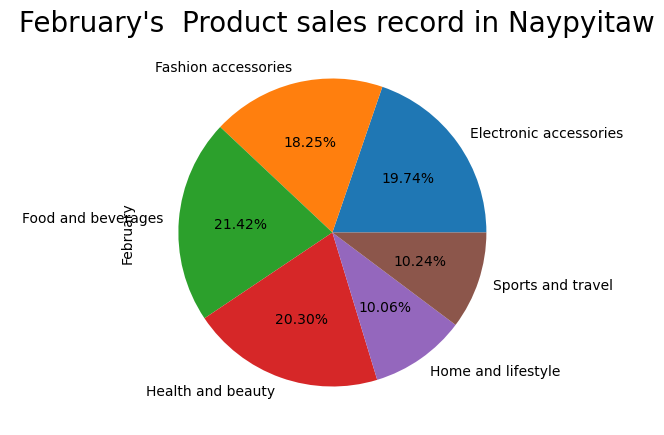

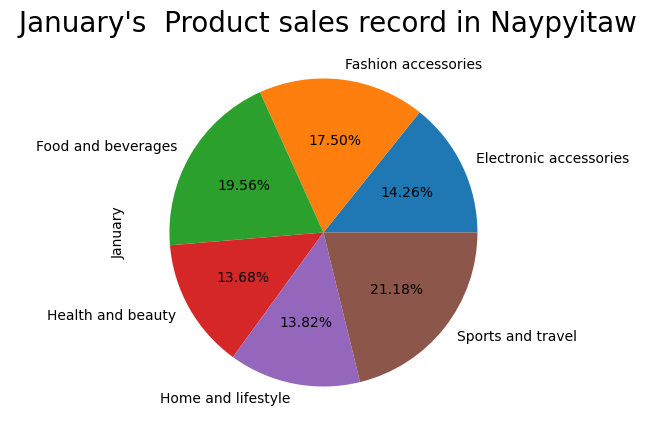

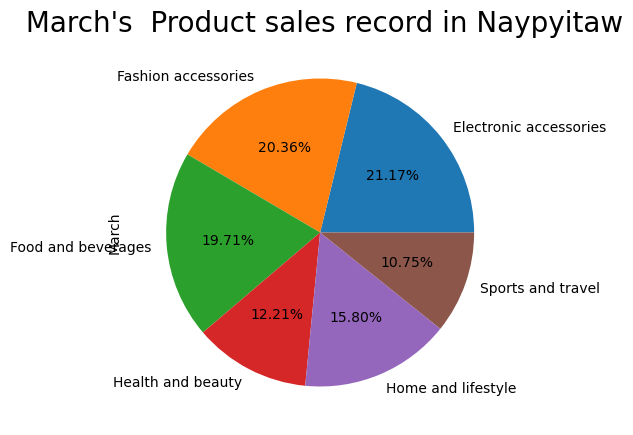

In [51]:
for month in PIVOTING_Naypyitaw_most_selling_month.index:
    plt.figure(figsize=(5,5))
    plt.title(f" {month}'s  Product sales record in Naypyitaw",fontsize=20)    
    monthly_pie= PIVOTING_Naypyitaw_most_selling_month.loc[month].plot(kind='pie', autopct='%1.2f%%')

### Naypyitaw's Product wise monthly revenue collected

In [52]:
Naypyitaw_month_wise_rev= Naypyitaw_func_data.city_branch_monthly_revenue()
Naypyitaw_month_wise_rev

Product line Month_name  Sum_Total_Rev
0   Electronic accessories   February        5213.22
1   Electronic accessories    January        5457.37
2   Electronic accessories      March        7395.10
3      Fashion accessories   February        7332.49
4      Fashion accessories    January        6080.98
5      Fashion accessories      March        7119.93
6       Food and beverages   February        7039.35
7       Food and beverages    January        7919.07
8       Food and beverages      March        7676.68
9        Health and beauty   February        5552.71
10       Health and beauty    January        5733.99
11       Health and beauty      March        4537.42
12      Home and lifestyle   February        2859.91
13      Home and lifestyle    January        5328.29
14      Home and lifestyle      March        5045.66
15       Sports and travel   February        3368.97
16       Sports and travel    January        7989.52
17       Sports and travel      March        3652.87

In [53]:
PIVOTING_Naypyitaw_month_wise_rev= Naypyitaw_month_wise_rev.pivot(index='Month_name', columns='Product line', values='Sum_Total_Rev')
PIVOTING_Naypyitaw_month_wise_rev

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Month_name                                                                      
February                     5213.22              7332.49             7039.35   
January                      5457.37              6080.98             7919.07   
March                        7395.10              7119.93             7676.68   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Month_name                                                              
February                5552.71             2859.91            3368.97  
January                 5733.99             5328.29            7989.52  
March                   4537.42             5045.66            3652.87

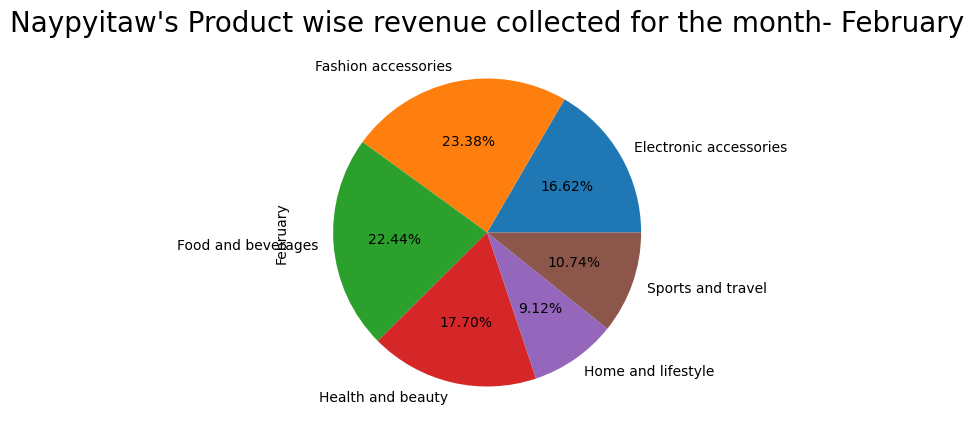

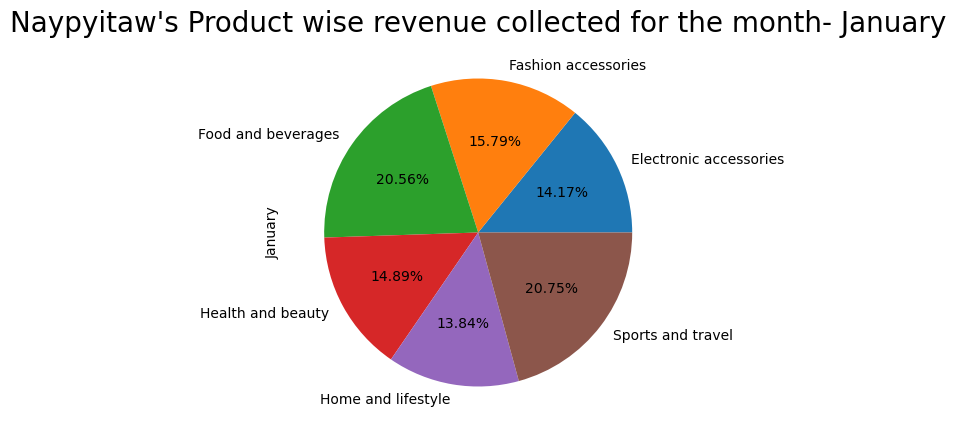

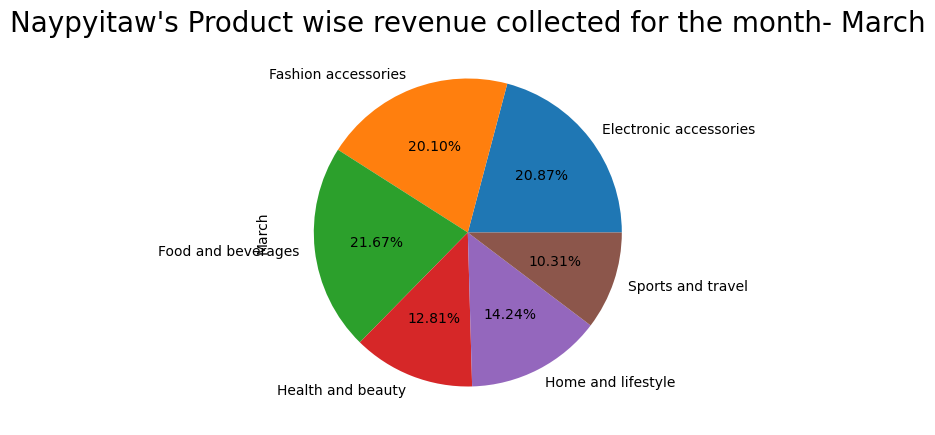

In [54]:
for month in PIVOTING_Naypyitaw_month_wise_rev.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Naypyitaw's Product wise revenue collected for the month- {month}",fontsize=20)
    pie_month_rev_Naypyitaw= PIVOTING_Naypyitaw_month_wise_rev.loc[month].plot(kind='pie', autopct='%1.2f%%')
    plt.show()

### Gender who Purchased the most from the Branchs of Naypyitaw in monthly basis

In [55]:
Naypyitaw_most_performing_gender= Naypyitaw_func_data.city_branch_wise_most_performing_gender()
Naypyitaw_most_performing_gender

Gender Month_name Branch  Gender_total_quantity_sold
0   Female   February      A                         110
1   Female   February      B                         137
2   Female   February      C                          91
3   Female    January      A                         110
4   Female    January      B                         142
5   Female    January      C                         148
6   Female      March      A                         128
7   Female      March      B                          81
8   Female      March      C                         102
9     Male   February      A                          56
10    Male   February      B                          74
11    Male   February      C                          69
12    Male    January      A                         144
13    Male    January      B                          71
14    Male    January      C                          65
15    Male      March      A                         100
16    Male      March      B                          99
17    Male      March      C                         104

In [56]:
PIVOTING_Naypyitaw_most_performing_gender= Naypyitaw_most_performing_gender.pivot(index='Month_name', columns=['Gender','Branch'],values='Gender_total_quantity_sold')
PIVOTING_Naypyitaw_most_performing_gender

Gender     Female           Male         
Branch          A    B    C    A   B    C
Month_name                               
February      110  137   91   56  74   69
January       110  142  148  144  71   65
March         128   81  102  100  99  104

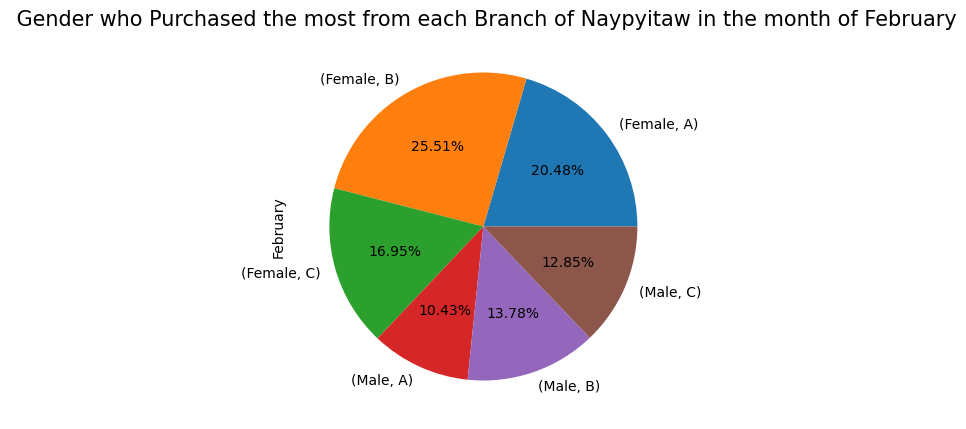

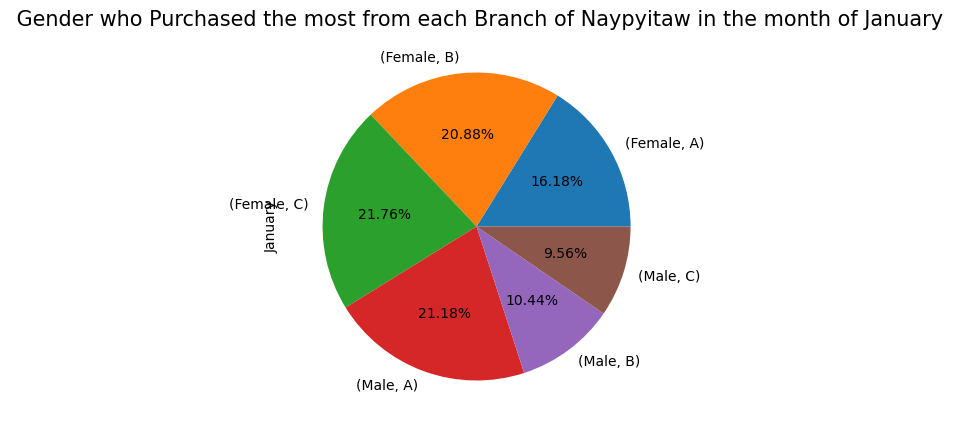

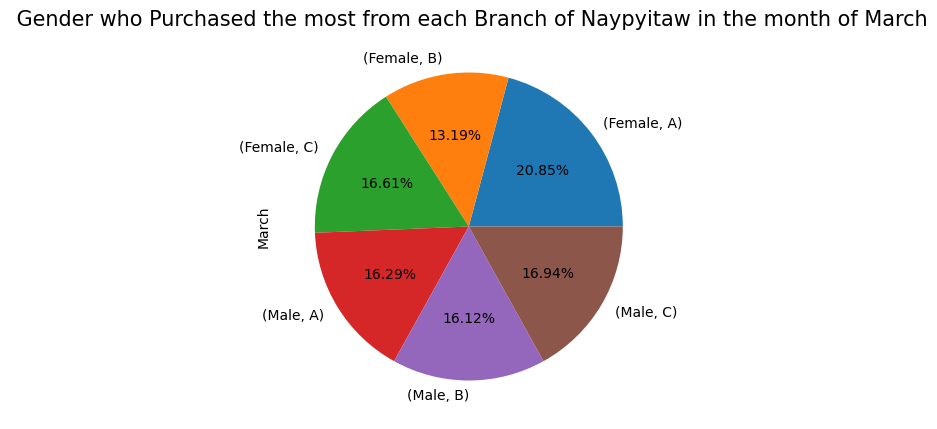

In [57]:
for month in PIVOTING_Naypyitaw_most_performing_gender.index:
    plt.figure(figsize=(5,5))
    plt.title(f" Gender who Purchased the most from each Branch of Naypyitaw in the month of {month}", fontsize=15)
    best_pie= PIVOTING_Naypyitaw_most_performing_gender.loc[month].plot(kind='pie',autopct='%1.2f%%')
    

### Gender wise who Purchased the most number of items in a month in  Naypyitaw

In [58]:
Total_Quantity_sold_Naypyitaw_gender= Naypyitaw_func_data.monthly_Gender_wise_total_QUANTITY_sold()
Total_Quantity_sold_Naypyitaw_gender

Product line Month_name  Gender  Total_Quantity_Sold
0   Electronic accessories   February  Female                   69
1   Electronic accessories   February    Male                   37
2   Electronic accessories    January  Female                   47
3   Electronic accessories    January    Male                   50
4   Electronic accessories      March  Female                   48
5   Electronic accessories      March    Male                   82
6      Fashion accessories   February  Female                   67
7      Fashion accessories   February    Male                   31
8      Fashion accessories    January  Female                   71
9      Fashion accessories    January    Male                   48
10     Fashion accessories      March  Female                   54
11     Fashion accessories      March    Male                   71
12      Food and beverages   February  Female                   70
13      Food and beverages   February    Male                   45
14      Food and beverages    January  Female                   75
15      Food and beverages    January    Male                   58
16      Food and beverages      March  Female                   86
17      Food and beverages      March    Male                   35
18       Health and beauty   February  Female                   64
19       Health and beauty   February    Male                   45
20       Health and beauty    January  Female                   29
21       Health and beauty    January    Male                   64
22       Health and beauty      March  Female                   27
23       Health and beauty      March    Male                   48
24      Home and lifestyle   February  Female                   28
25      Home and lifestyle   February    Male                   26
26      Home and lifestyle    January  Female                   60
27      Home and lifestyle    January    Male                   34
28      Home and lifestyle      March  Female                   64
29      Home and lifestyle      March    Male                   33
30       Sports and travel   February  Female                   40
31       Sports and travel   February    Male                   15
32       Sports and travel    January  Female                  118
33       Sports and travel    January    Male                   26
34       Sports and travel      March  Female                   32
35       Sports and travel      March    Male                   34

In [59]:
PIVOTING_Total_Quantity_sold_Naypyitaw_gender=Total_Quantity_sold_Naypyitaw_gender.pivot(index='Month_name', columns=['Product line','Gender'],values='Total_Quantity_Sold')
PIVOTING_Total_Quantity_sold_Naypyitaw_gender

Product line Electronic accessories      Fashion accessories       \
Gender                       Female Male              Female Male   
Month_name                                                          
February                         69   37                  67   31   
January                          47   50                  71   48   
March                            48   82                  54   71   

Product line Food and beverages      Health and beauty       \
Gender                   Female Male            Female Male   
Month_name                                                    
February                     70   45                64   45   
January                      75   58                29   64   
March                        86   35                27   48   

Product line Home and lifestyle      Sports and travel       
Gender                   Female Male            Female Male  
Month_name                                                   
February                     28   26                40   15  
January                      60   34               118   26  
March                        64   33                32   34

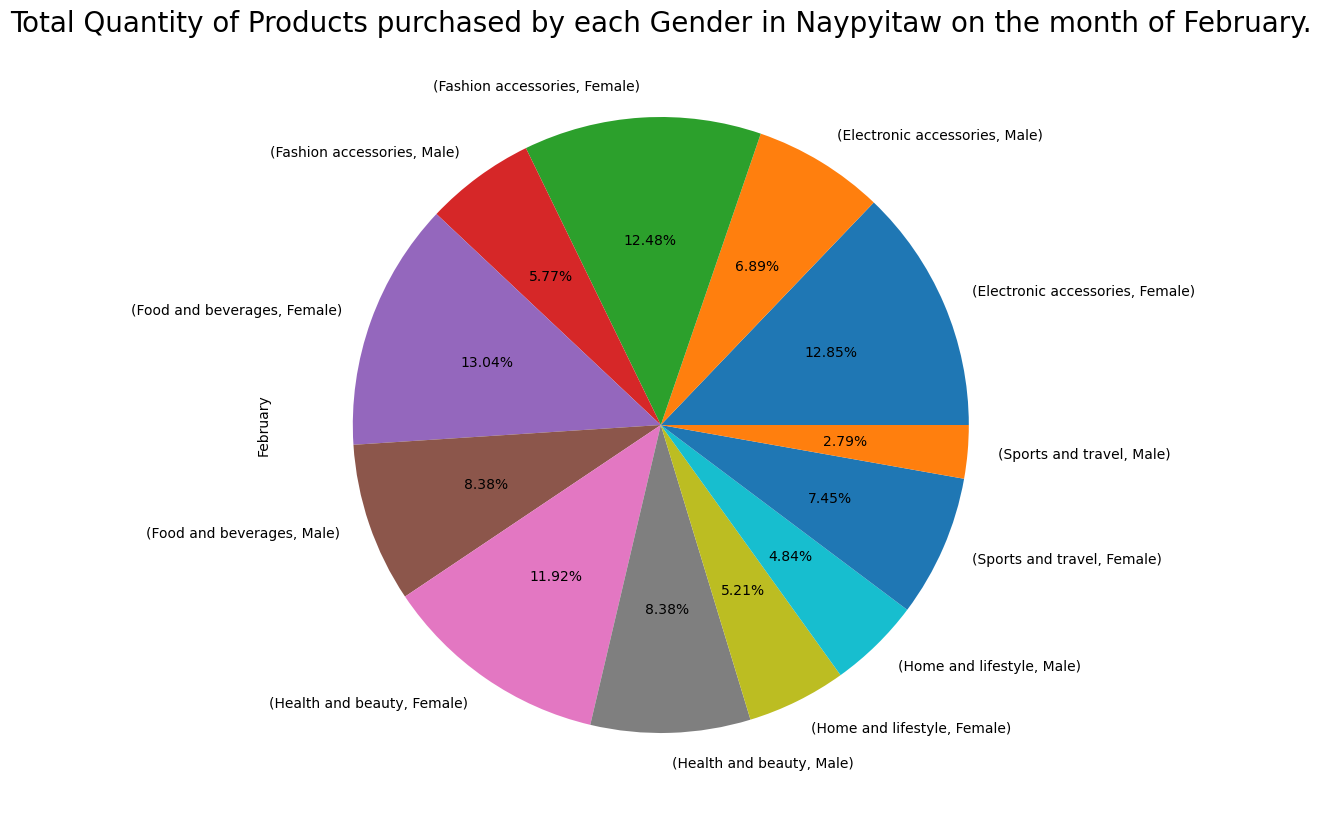

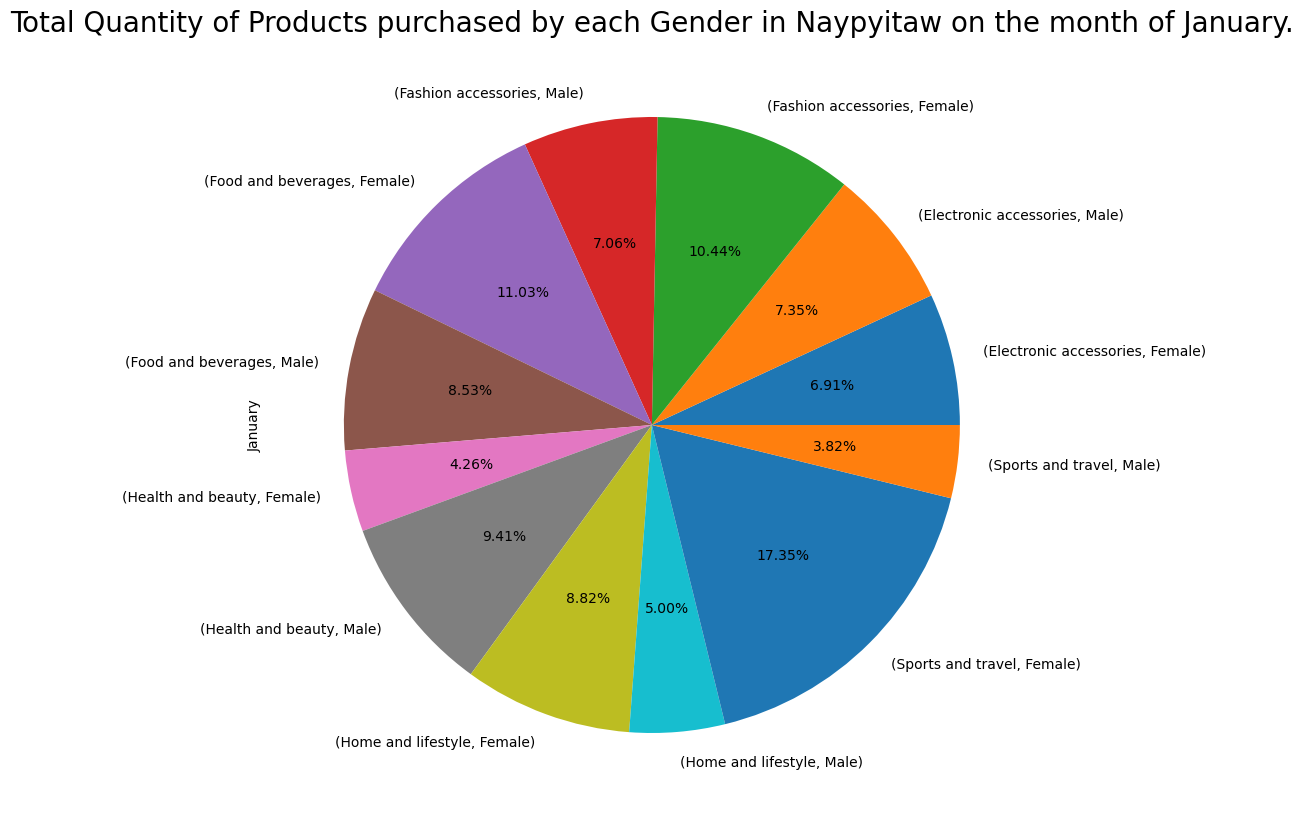

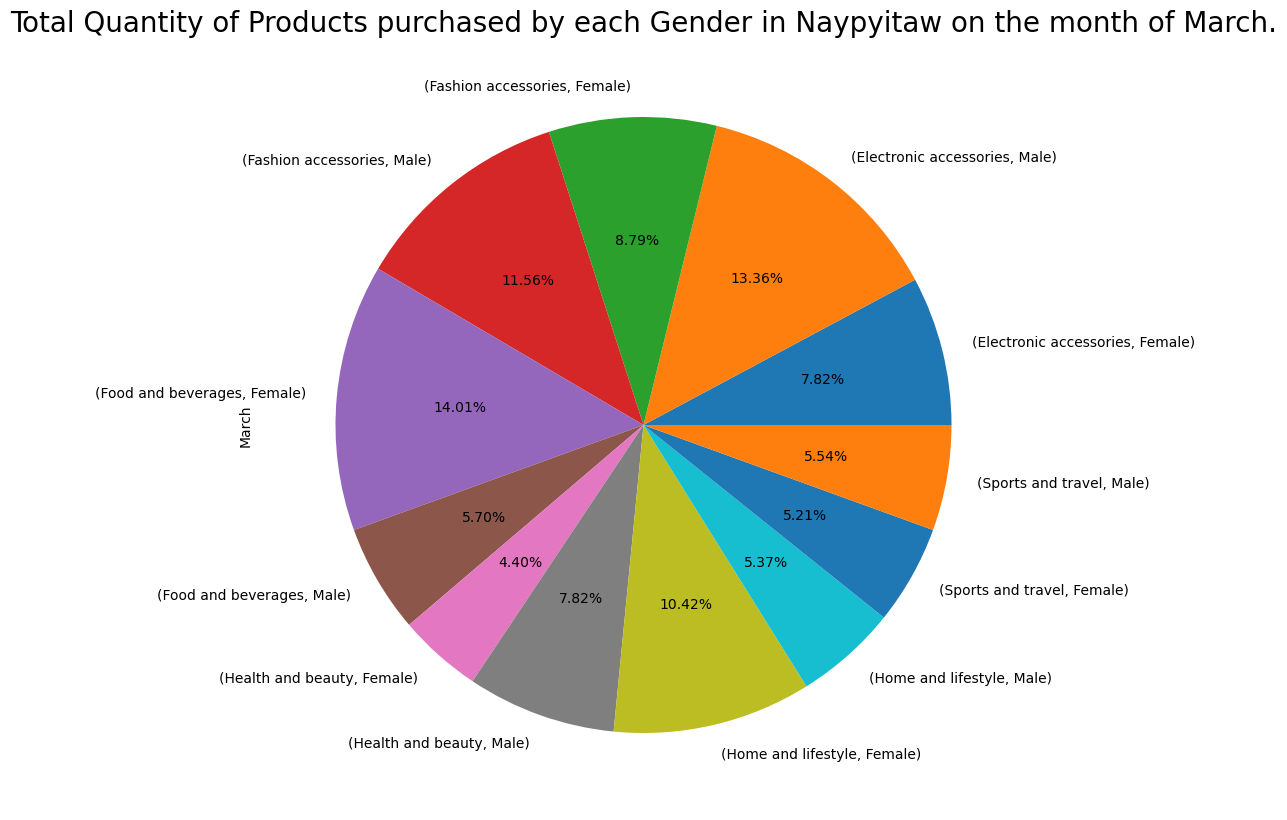

In [60]:
for month in PIVOTING_Total_Quantity_sold_Naypyitaw_gender.index:
    plt.figure(figsize=(15,10))
    plt.title(f"Total Quantity of Products purchased by each Gender in Naypyitaw on the month of {month}.", fontsize=20)    
    best_pie= PIVOTING_Total_Quantity_sold_Naypyitaw_gender.loc[month].plot(kind='pie',autopct='%1.2f%%')

### Naypyitaw's Payment Methods

In [61]:
Naypyitaw_Payment_method= Naypyitaw_func_data.city_Payment_method()
Naypyitaw_Payment_method

Month_name      Payment  Payment_count
0   February         Cash             36
1   February  Credit card             32
2   February      Ewallet             32
3    January         Cash             48
4    January  Credit card             35
5    January      Ewallet             39
6      March         Cash             40
7      March  Credit card             31
8      March      Ewallet             35

In [62]:
PIVOTING_Naypyitaw_Payment_method= Naypyitaw_Payment_method.pivot(index='Month_name',columns='Payment', values='Payment_count')
PIVOTING_Naypyitaw_Payment_method

Payment     Cash  Credit card  Ewallet
Month_name                            
February      36           32       32
January       48           35       39
March         40           31       35

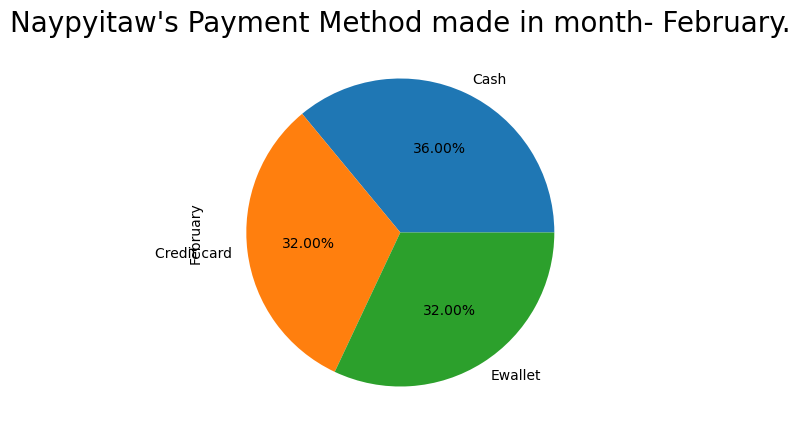

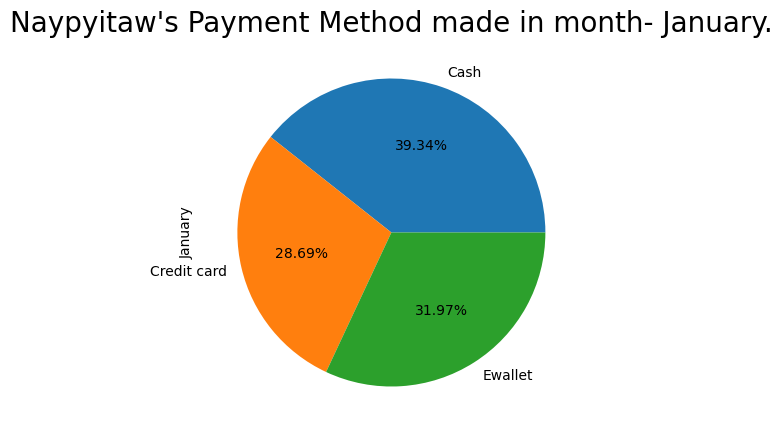

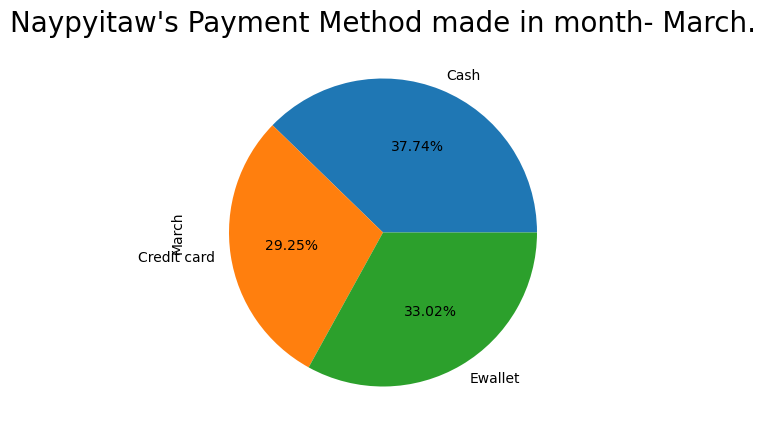

In [63]:
for month in PIVOTING_Naypyitaw_Payment_method.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Naypyitaw's Payment Method made in month- {month}.", fontsize=20)    
    best_pie= PIVOTING_Naypyitaw_Payment_method.loc[month].plot(kind='pie',autopct='%1.2f%%')

### Customers type generated the most Revenue in different branches in Naypyitaw

In [64]:
customer_generated_most_revenue_Naypyitaw= Naypyitaw_func_data.customer_generated_most_rev()
customer_generated_most_revenue_Naypyitaw

Customer type Branch  Total_Amount
0        Member      A      14745.60
1        Member      B      21303.27
2        Member      C      18123.78
3        Normal      A      21240.04
4        Normal      B      13854.48
5        Normal      C      16036.36

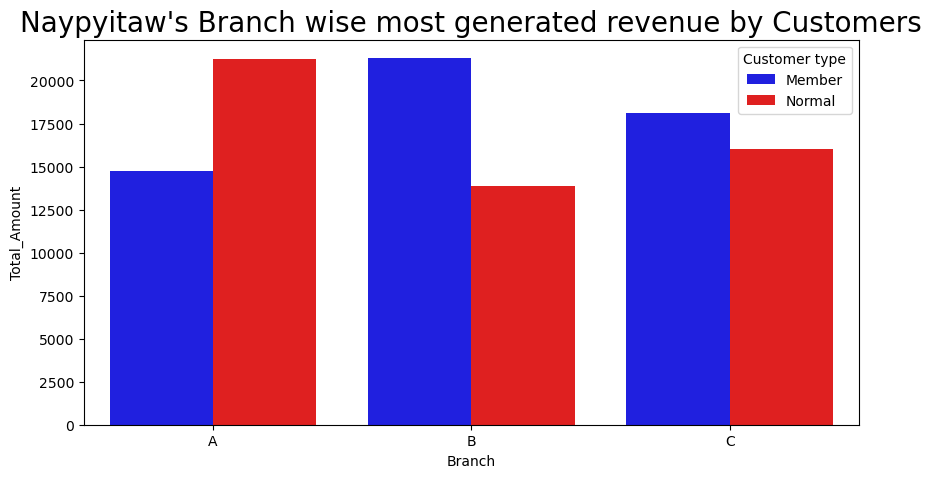

In [65]:
plt.figure(figsize=(10,5))
plt.title("Naypyitaw's Branch wise most generated revenue by Customers", fontsize=20)
customers=sns.barplot(data=customer_generated_most_revenue_Naypyitaw, x=customer_generated_most_revenue_Naypyitaw['Branch'],y=customer_generated_most_revenue_Naypyitaw["Total_Amount"],hue=customer_generated_most_revenue_Naypyitaw['Customer type'], palette=['Blue','Red'] )

# Yangon

In [66]:
Yangon_data= grouping_by_CITY_BRANCH.get_group("Yangon")
Yangon_data.head(5)

Invoice ID Branch    City Customer type  Gender            Product line  \
0  750-67-8428      A  Yangon        Member  Female       Health and beauty   
2  631-41-3108      A  Yangon        Normal    Male      Home and lifestyle   
3  123-19-1176      B  Yangon        Member    Male       Health and beauty   
4  373-73-7910      C  Yangon        Normal    Male       Sports and travel   
6  355-53-5943      A  Yangon        Member  Female  Electronic accessories   

   Unit price  Quantity       Date      Time      Payment  Rating Month_name  \
0       74.69         7 2019-01-05  13:08:00      Ewallet     9.1    January   
2       46.33         7 2019-03-03  13:23:00  Credit card     7.4      March   
3       58.22         8 2019-01-27  20:33:00      Ewallet     8.4    January   
4       86.31         7 2019-02-08  10:37:00      Ewallet     5.3   February   
6       68.84         6 2019-02-25  14:36:00      Ewallet     5.8   February   

   Total_revenue  
0         522.83  
2         324.31  
3         465.76  
4         604.17  
6         413.04

In [67]:
Yangon_func_data= City_Data(Yangon_data)
Yangon_func_data

### Gender wise Customers visted the stores in Yangon

In [68]:
Yangon_gender_count=Yangon_func_data.branch_wise_Gender_count()
Yangon_gender_count

Branch  Gender  Count_of_gender
0      A  Female               53
1      A    Male               61
2      B  Female               62
3      B    Male               51
4      C  Female               46
5      C    Male               67

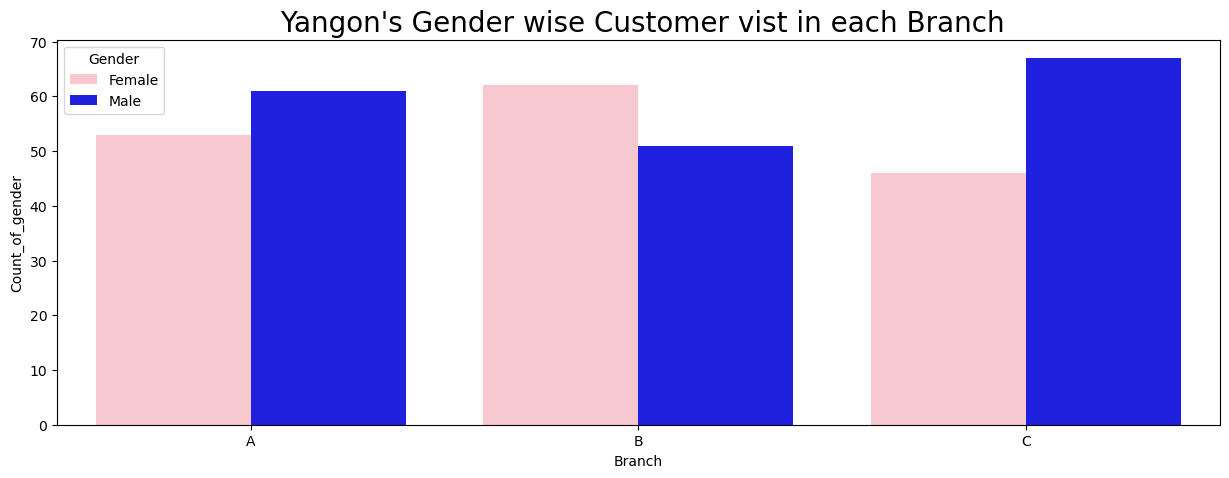

In [69]:
plt.figure(figsize=(15,5))
plt.title(" Yangon's Gender wise Customer vist in each Branch", fontsize=20)
gender_count_of_Yangon= sns.barplot(data=Yangon_gender_count, x= Yangon_gender_count['Branch'], y=Yangon_gender_count['Count_of_gender'], hue= Yangon_gender_count['Gender'], palette=['Pink','Blue'])

### Yangon's branch wise Total Quantity of different products sold.

In [70]:
Yangon_total_quantity_sold= Yangon_func_data.city_branch_wise_total_quantity_sold()
Yangon_total_quantity_sold

Product line Branch  Total_Quantity_Sold
0   Electronic accessories      A                   92
1   Electronic accessories      B                  145
2   Electronic accessories      C                   85
3      Fashion accessories      A                   50
4      Fashion accessories      B                  106
5      Fashion accessories      C                  107
6       Food and beverages      A                   92
7       Food and beverages      B                   87
8       Food and beverages      C                  134
9        Health and beauty      A                   90
10       Health and beauty      B                   65
11       Health and beauty      C                  102
12      Home and lifestyle      A                  145
13      Home and lifestyle      B                  158
14      Home and lifestyle      C                   68
15       Sports and travel      A                  129
16       Sports and travel      B                   70
17       Sports and travel      C                  134

In [71]:
PIVOTING_Yangon_total_quantity_sold= Yangon_total_quantity_sold.pivot(index='Branch',columns='Product line', values='Total_Quantity_Sold')
PIVOTING_Yangon_total_quantity_sold

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                                 92                   50                  92   
B                                145                  106                  87   
C                                 85                  107                 134   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                            90                 145                129  
B                            65                 158                 70  
C                           102                  68                134

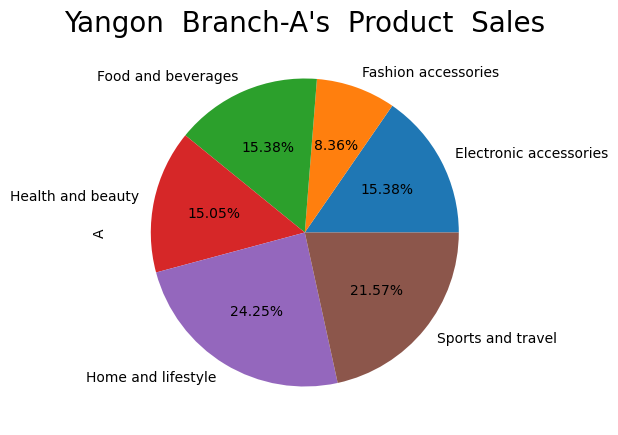

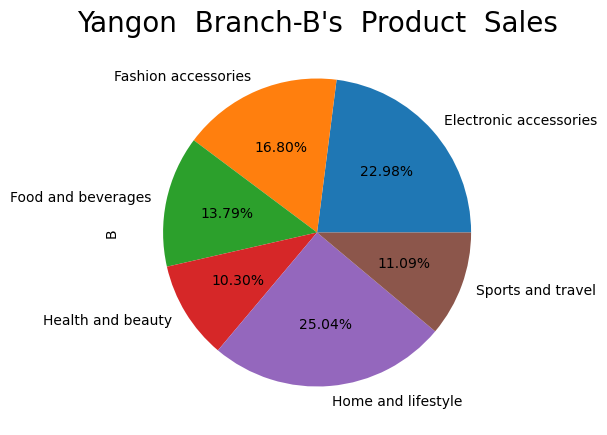

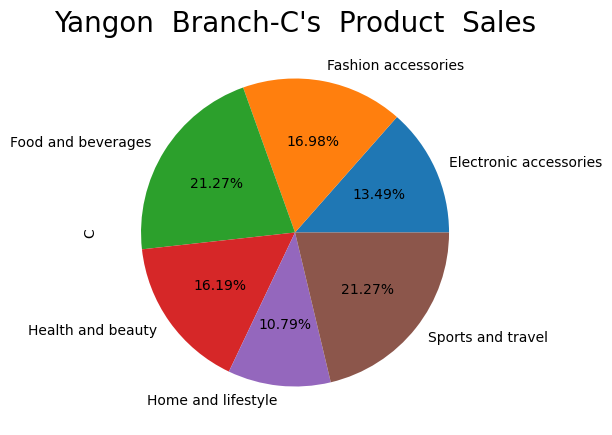

In [72]:
for branch in PIVOTING_Yangon_total_quantity_sold.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Yangon  Branch-{branch}'s  Product  Sales", fontsize=20)
    pie_chart= PIVOTING_Yangon_total_quantity_sold.loc[branch].plot(kind='pie', autopct='%1.2f%%')
    plt.show()

### Yangon's Branch wise Total Revenue generated by selling different products.

In [73]:
Yangon_total_revenue_for_each_product= Yangon_func_data.city_branch_wise_total_revenue_for_each_product()
Yangon_total_revenue_for_each_product

Product line Branch  Sum_Total_Revenue
0   Electronic accessories      A            4987.07
1   Electronic accessories      B            8390.38
2   Electronic accessories      C            4067.42
3      Fashion accessories      A            2833.53
4      Fashion accessories      B            6081.63
5      Fashion accessories      C            6639.61
6       Food and beverages      A            5412.37
7       Food and beverages      B            4390.89
8       Food and beverages      C            6542.55
9        Health and beauty      A            3921.07
10       Health and beauty      B            2901.06
11       Health and beauty      C            5175.73
12      Home and lifestyle      A            8200.30
13      Home and lifestyle      B           10027.89
14      Home and lifestyle      C            3121.52
15       Sports and travel      A            8292.93
16       Sports and travel      B            3401.66
17       Sports and travel      C            6755.60

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to p

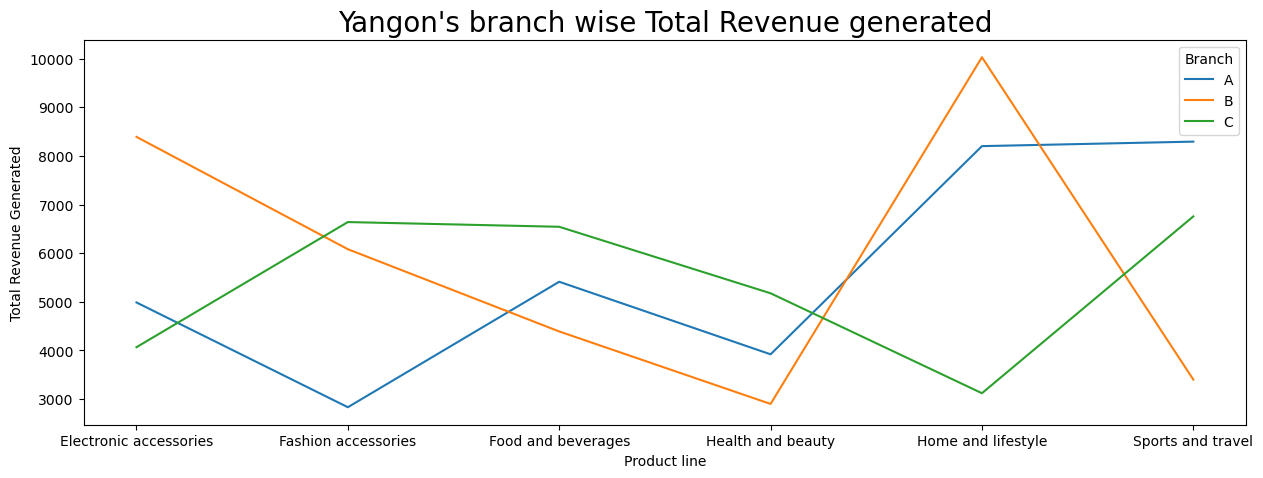

In [74]:
plt.figure(figsize=(15,5))
plt.title("Yangon's branch wise Total Revenue generated", fontsize=20)
total_revenue= sns.lineplot(data=Yangon_total_revenue_for_each_product, x=Yangon_total_revenue_for_each_product['Product line'], y= Yangon_total_revenue_for_each_product['Sum_Total_Revenue'], hue=Yangon_total_revenue_for_each_product['Branch'])
plt.ylabel('Total Revenue Generated')
plt.show()

### Yangon's most selling month product wise.

In [75]:
Yangon_most_selling_month= Yangon_func_data.city_branch_wise_most_selling_month()
Yangon_most_selling_month

Product line Month_name  month_total_sale
0   Electronic accessories   February                89
1   Electronic accessories    January               117
2   Electronic accessories      March               116
3      Fashion accessories   February                79
4      Fashion accessories    January               114
5      Fashion accessories      March                70
6       Food and beverages   February               127
7       Food and beverages    January                90
8       Food and beverages      March                96
9        Health and beauty   February                55
10       Health and beauty    January                70
11       Health and beauty      March               132
12      Home and lifestyle   February                68
13      Home and lifestyle    January               175
14      Home and lifestyle      March               128
15       Sports and travel   February                75
16       Sports and travel    January               119
17       Sports and travel      March               139

In [76]:
PIVOTING_Yangon_most_selling_month= Yangon_most_selling_month.pivot(index='Month_name',columns='Product line', values='month_total_sale')
PIVOTING_Yangon_most_selling_month

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Month_name                                                                      
February                          89                   79                 127   
January                          117                  114                  90   
March                            116                   70                  96   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Month_name                                                              
February                     55                  68                 75  
January                      70                 175                119  
March                       132                 128                139

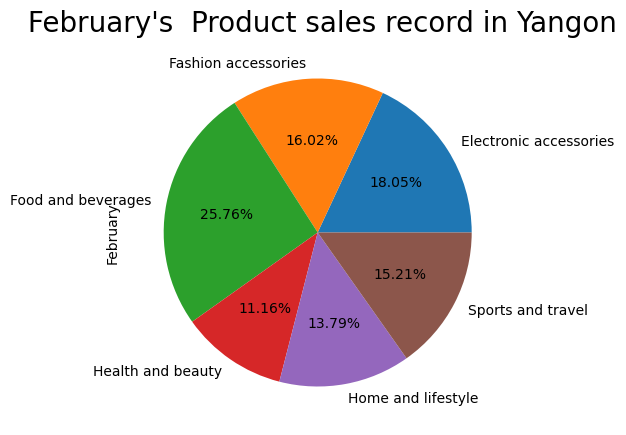

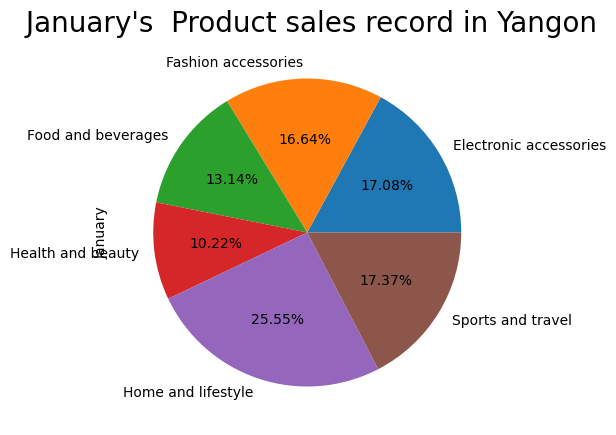

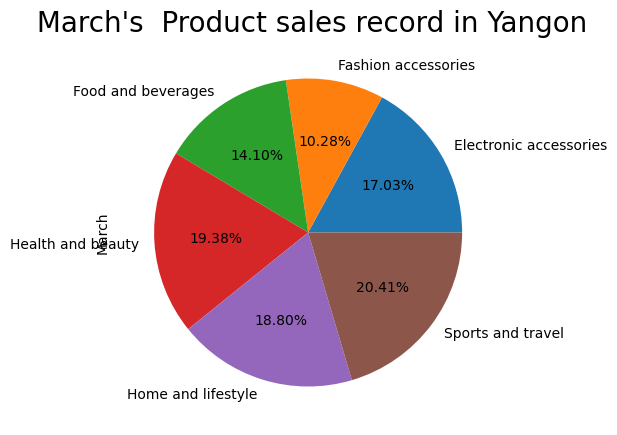

In [77]:
for month in PIVOTING_Yangon_most_selling_month.index:
    plt.figure(figsize=(5,5))
    plt.title(f" {month}'s  Product sales record in Yangon",fontsize=20)    
    monthly_pie= PIVOTING_Yangon_most_selling_month.loc[month].plot(kind='pie', autopct='%1.2f%%')

### Yangon's Product wise monthly revenue collected

In [78]:
Yangon_month_wise_rev= Yangon_func_data.city_branch_monthly_revenue()
Yangon_month_wise_rev

Product line Month_name  Sum_Total_Rev
0   Electronic accessories   February        4955.02
1   Electronic accessories    January        6096.45
2   Electronic accessories      March        6393.40
3      Fashion accessories   February        4927.27
4      Fashion accessories    January        6521.42
5      Fashion accessories      March        4106.08
6       Food and beverages   February        6718.31
7       Food and beverages    January        4424.98
8       Food and beverages      March        5202.52
9        Health and beauty   February        2776.65
10       Health and beauty    January        3773.90
11       Health and beauty      March        5447.31
12      Home and lifestyle   February        4544.41
13      Home and lifestyle    January        9822.47
14      Home and lifestyle      March        6982.83
15       Sports and travel   February        4516.55
16       Sports and travel    January        6199.95
17       Sports and travel      March        7733.69

In [79]:
PIVOTING_Yangon_month_wise_rev= Yangon_month_wise_rev.pivot(index='Month_name', columns='Product line', values='Sum_Total_Rev')
PIVOTING_Yangon_month_wise_rev

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Month_name                                                                      
February                     4955.02              4927.27             6718.31   
January                      6096.45              6521.42             4424.98   
March                        6393.40              4106.08             5202.52   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Month_name                                                              
February                2776.65             4544.41            4516.55  
January                 3773.90             9822.47            6199.95  
March                   5447.31             6982.83            7733.69

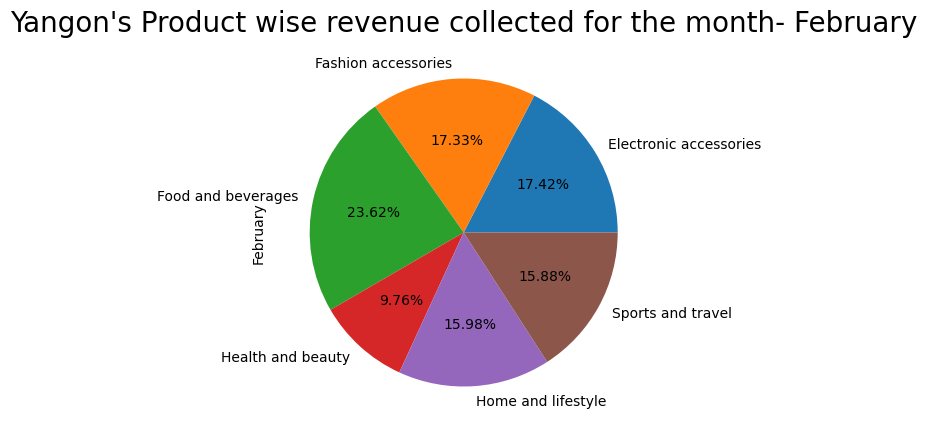

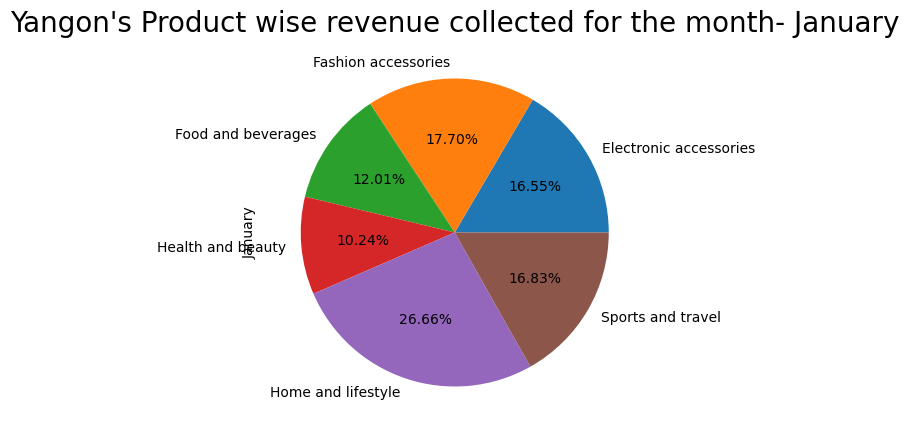

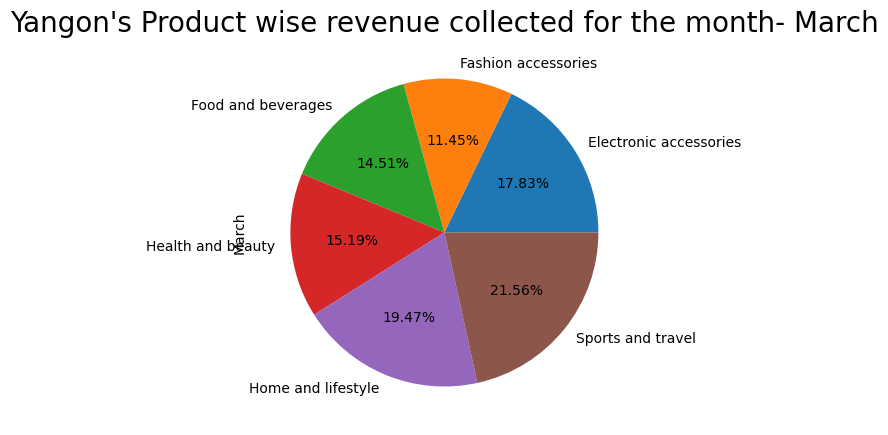

In [80]:
for month in PIVOTING_Yangon_month_wise_rev.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Yangon's Product wise revenue collected for the month- {month}",fontsize=20)
    pie_month_rev_Yangon= PIVOTING_Yangon_month_wise_rev.loc[month].plot(kind='pie', autopct='%1.2f%%')
    plt.show()

### Gender who Purchased the most from the Branchs of Yangon in monthly basis

In [81]:
Yangon_most_performing_gender= Yangon_func_data.city_branch_wise_most_performing_gender()
Yangon_most_performing_gender

Gender Month_name Branch  Gender_total_quantity_sold
0   Female   February      A                          91
1   Female   February      B                          80
2   Female   February      C                          96
3   Female    January      A                          79
4   Female    January      B                         146
5   Female    January      C                          85
6   Female      March      A                         127
7   Female      March      B                         136
8   Female      March      C                          69
9     Male   February      A                          74
10    Male   February      B                          53
11    Male   February      C                          99
12    Male    January      A                          88
13    Male    January      B                         132
14    Male    January      C                         155
15    Male      March      A                         139
16    Male      March      B                          84
17    Male      March      C                         126

In [82]:
PIVOTING_Yangon_most_performing_gender= Yangon_most_performing_gender.pivot(index='Month_name', columns=['Gender','Branch'],values='Gender_total_quantity_sold')
PIVOTING_Yangon_most_performing_gender

Gender     Female          Male          
Branch          A    B   C    A    B    C
Month_name                               
February       91   80  96   74   53   99
January        79  146  85   88  132  155
March         127  136  69  139   84  126

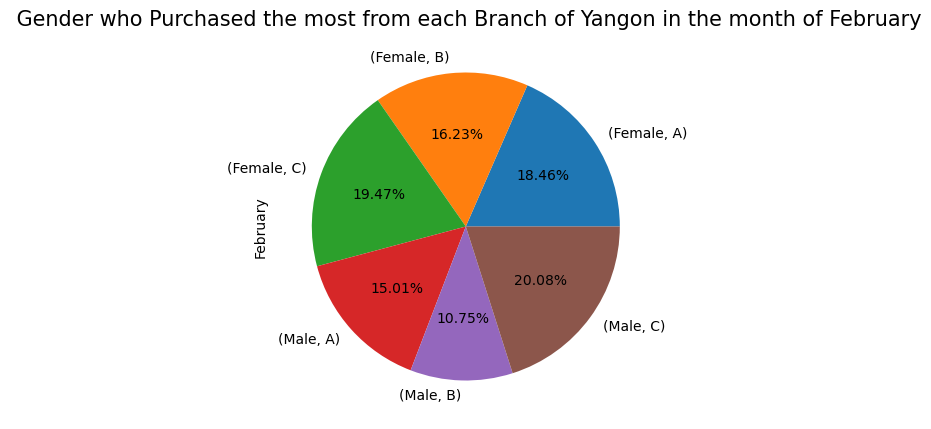

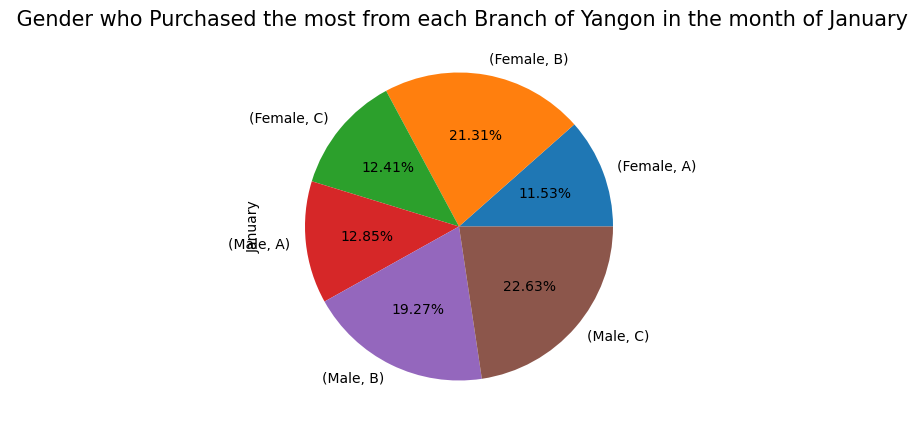

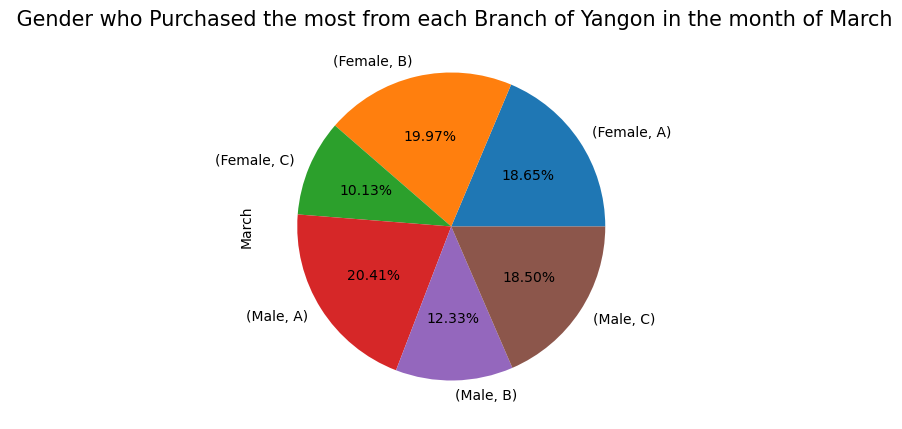

In [83]:
for month in PIVOTING_Yangon_most_performing_gender.index:
    plt.figure(figsize=(5,5))
    plt.title(f" Gender who Purchased the most from each Branch of Yangon in the month of {month}", fontsize=15)
    best_pie= PIVOTING_Yangon_most_performing_gender.loc[month].plot(kind='pie',autopct='%1.2f%%')

### Gender wise who Purchased the most number of items in Yangon in a month

In [84]:
Total_Quantity_sold_Yangon_gender= Yangon_func_data.monthly_Gender_wise_total_QUANTITY_sold()
Total_Quantity_sold_Yangon_gender

Product line Month_name  Gender  Total_Quantity_Sold
0   Electronic accessories   February  Female                   53
1   Electronic accessories   February    Male                   36
2   Electronic accessories    January  Female                   58
3   Electronic accessories    January    Male                   59
4   Electronic accessories      March  Female                   57
5   Electronic accessories      March    Male                   59
6      Fashion accessories   February  Female                   44
7      Fashion accessories   February    Male                   35
8      Fashion accessories    January  Female                   65
9      Fashion accessories    January    Male                   49
10     Fashion accessories      March  Female                   52
11     Fashion accessories      March    Male                   18
12      Food and beverages   February  Female                   54
13      Food and beverages   February    Male                   73
14      Food and beverages    January  Female                   26
15      Food and beverages    January    Male                   64
16      Food and beverages      March  Female                   34
17      Food and beverages      March    Male                   62
18       Health and beauty   February  Female                   23
19       Health and beauty   February    Male                   32
20       Health and beauty    January  Female                   37
21       Health and beauty    January    Male                   33
22       Health and beauty      March  Female                   51
23       Health and beauty      March    Male                   81
24      Home and lifestyle   February  Female                   45
25      Home and lifestyle   February    Male                   23
26      Home and lifestyle    January  Female                   83
27      Home and lifestyle    January    Male                   92
28      Home and lifestyle      March  Female                   71
29      Home and lifestyle      March    Male                   57
30       Sports and travel   February  Female                   48
31       Sports and travel   February    Male                   27
32       Sports and travel    January  Female                   41
33       Sports and travel    January    Male                   78
34       Sports and travel      March  Female                   67
35       Sports and travel      March    Male                   72

In [85]:
PIVOTING_Total_Quantity_sold_Yangon_gender= Total_Quantity_sold_Yangon_gender.pivot(index='Month_name', columns=['Product line','Gender'],values='Total_Quantity_Sold')
PIVOTING_Total_Quantity_sold_Yangon_gender

Product line Electronic accessories      Fashion accessories       \
Gender                       Female Male              Female Male   
Month_name                                                          
February                         53   36                  44   35   
January                          58   59                  65   49   
March                            57   59                  52   18   

Product line Food and beverages      Health and beauty       \
Gender                   Female Male            Female Male   
Month_name                                                    
February                     54   73                23   32   
January                      26   64                37   33   
March                        34   62                51   81   

Product line Home and lifestyle      Sports and travel       
Gender                   Female Male            Female Male  
Month_name                                                   
February                     45   23                48   27  
January                      83   92                41   78  
March                        71   57                67   72

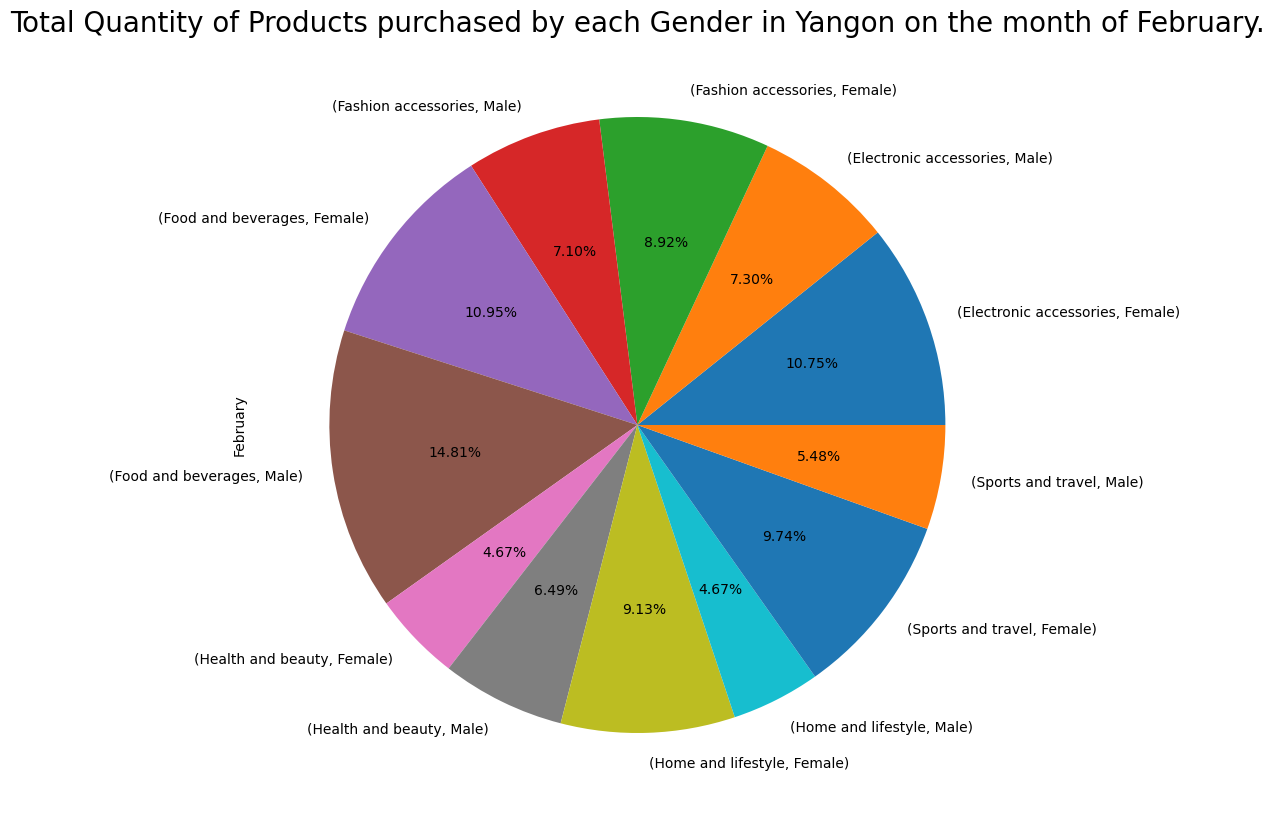

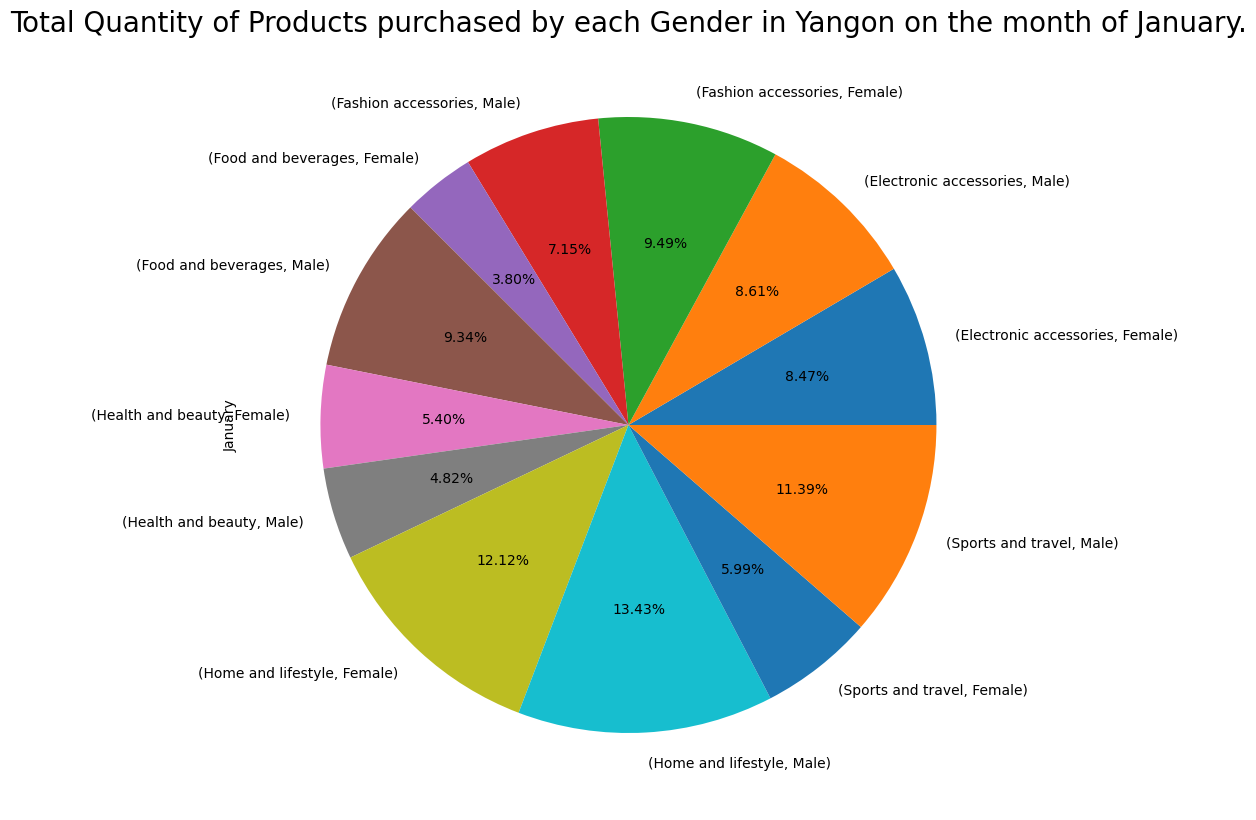

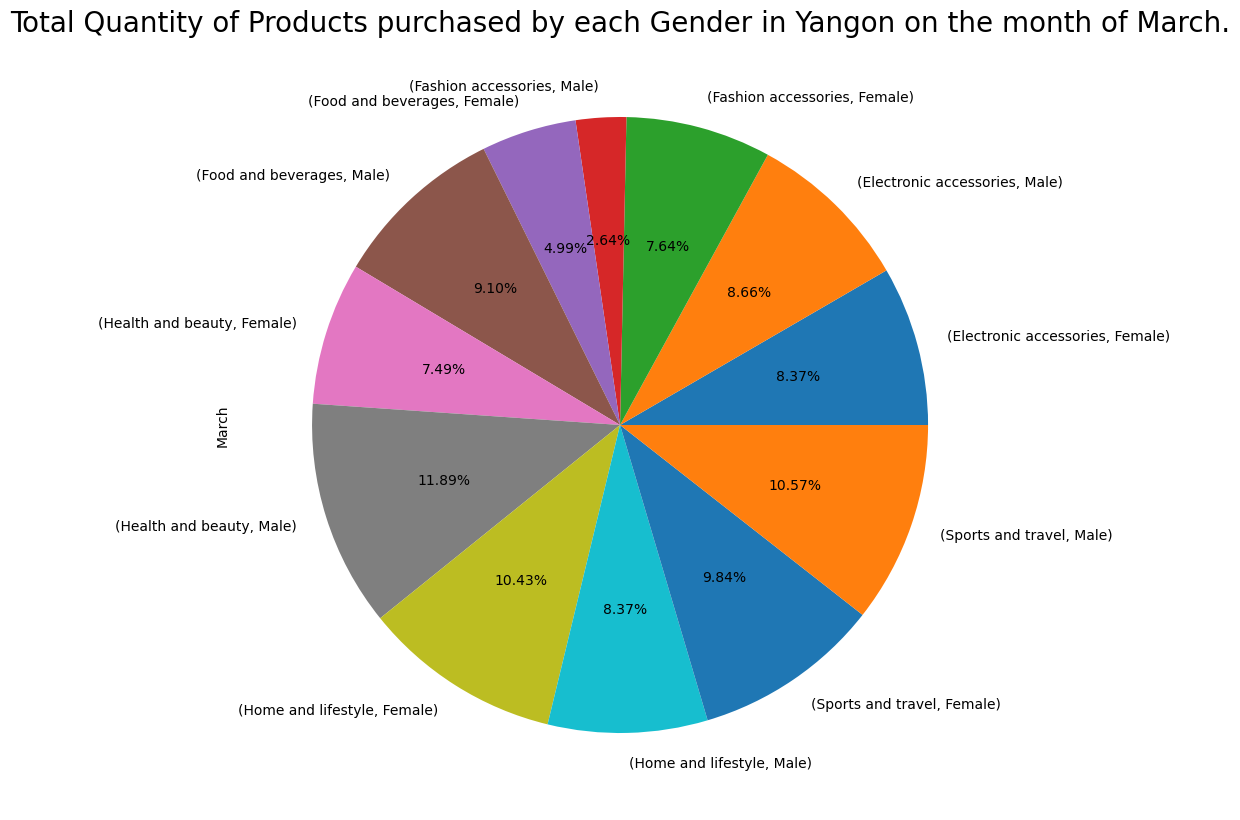

In [86]:
for month in PIVOTING_Total_Quantity_sold_Yangon_gender.index:
    plt.figure(figsize=(15,10))
    plt.title(f"Total Quantity of Products purchased by each Gender in Yangon on the month of {month}.", fontsize=20)    
    best_pie= PIVOTING_Total_Quantity_sold_Yangon_gender.loc[month].plot(kind='pie',autopct='%1.2f%%')

### Yangon's Payment Methods

In [87]:
Yangon_Payment_method= Yangon_func_data.city_Payment_method()
Yangon_Payment_method

Month_name      Payment  Payment_count
0   February         Cash             32
1   February  Credit card             28
2   February      Ewallet             34
3    January         Cash             39
4    January  Credit card             34
5    January      Ewallet             46
6      March         Cash             39
7      March  Credit card             42
8      March      Ewallet             46

In [88]:
PIVOTING_Yangon_Payment_method= Yangon_Payment_method.pivot(index='Month_name',columns='Payment', values='Payment_count')
PIVOTING_Yangon_Payment_method

Payment     Cash  Credit card  Ewallet
Month_name                            
February      32           28       34
January       39           34       46
March         39           42       46

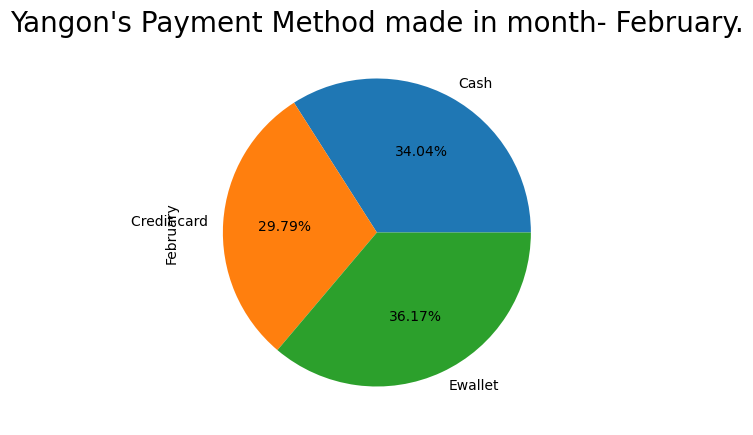

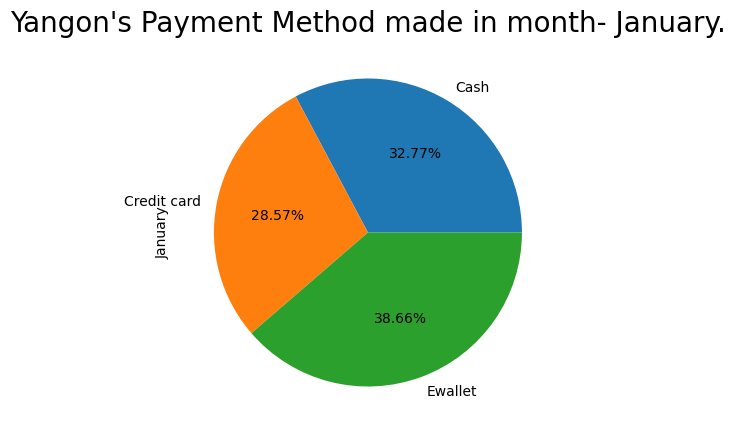

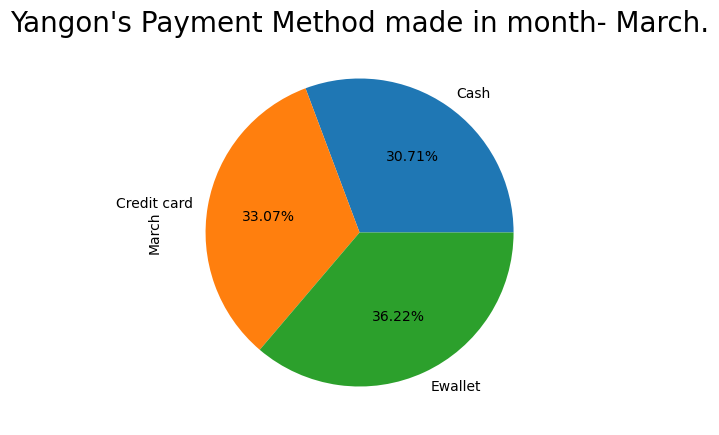

In [89]:
for month in PIVOTING_Yangon_Payment_method.index:
    plt.figure(figsize=(5,5))
    plt.title(f"Yangon's Payment Method made in month- {month}.", fontsize=20)    
    best_pie= PIVOTING_Yangon_Payment_method.loc[month].plot(kind='pie',autopct='%1.2f%%')

### Customers type generated the most Revenue in different branches in Yangon

In [90]:
customer_generated_most_revenue_Yangon= Yangon_func_data.customer_generated_most_rev()
customer_generated_most_revenue_Yangon

Customer type Branch  Total_Amount
0        Member      A      15423.34
1        Member      B      17867.72
2        Member      C      17792.25
3        Normal      A      18223.93
4        Normal      B      17325.79
5        Normal      C      14510.18

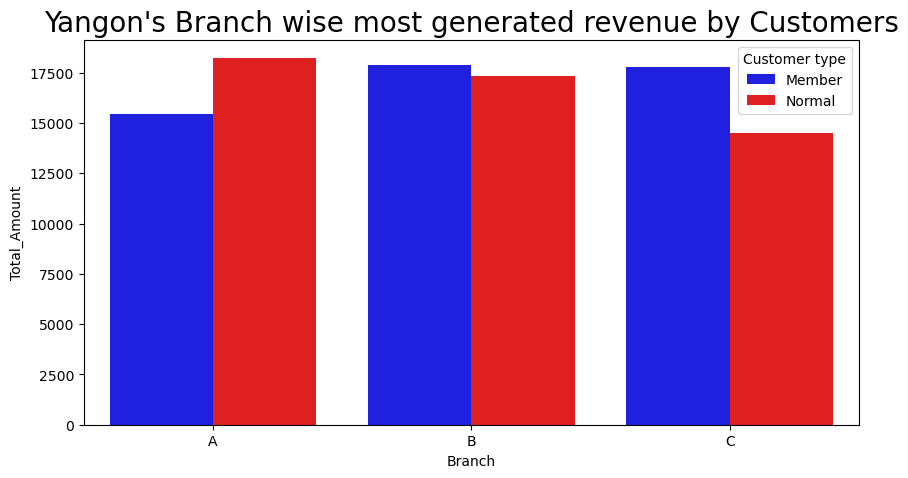

In [91]:
plt.figure(figsize=(10,5))
plt.title("Yangon's Branch wise most generated revenue by Customers", fontsize=20)
customers=sns.barplot(data=customer_generated_most_revenue_Yangon, x=customer_generated_most_revenue_Yangon['Branch'],y=customer_generated_most_revenue_Yangon["Total_Amount"],hue=customer_generated_most_revenue_Yangon['Customer type'], palette=['Blue','Red'] )

## Q2> What is the average price of an item sold at each branch of the city

### Function for the Average price of an item sold.

In [92]:
def Avg_price_city(dataframe): ## GROUPING THE "Product Line" & "Branch" and taking out the MEAN (Average) of the "Unit Price".
    df_avg_price_of_item_city_branch= dataframe.groupby(["Product line",'Branch'])["Unit price"].mean().reset_index(name="Avg_Unit_Price")
    return df_avg_price_of_item_city_branch

### Average Price in Mandalay

In [93]:
avg_price_Mandalay_data= grouping_by_CITY_BRANCH.get_group('Mandalay')
avg_price_Mandalay_data

Invoice ID Branch      City Customer type  Gender  \
9    692-92-5582      A  Mandalay        Member  Female   
10   351-62-0822      B  Mandalay        Member  Female   
11   529-56-3974      C  Mandalay        Member    Male   
15   299-46-1805      A  Mandalay        Member  Female   
19   319-50-3348      B  Mandalay        Normal  Female   
..           ...    ...       ...           ...     ...   
987  552-44-5977      C  Mandalay        Member    Male   
989  430-53-4718      A  Mandalay        Member    Male   
991  602-16-6955      B  Mandalay        Normal  Female   
993  690-01-6631      C  Mandalay        Normal    Male   
996  303-96-2227      A  Mandalay        Normal  Female   

               Product line  Unit price  Quantity       Date      Time  \
9        Food and beverages       54.84         3 2019-02-20  13:27:00   
10      Fashion accessories       14.48         4 2019-02-06  18:07:00   
11   Electronic accessories       25.51         4 2019-03-09  17:03:00   
15        Sports and travel       93.72         6 2019-01-15  16:19:00   
19       Home and lifestyle       40.30         2 2019-03-11  15:30:00   
..                      ...         ...       ...        ...       ...   
987       Health and beauty       62.00         8 2019-01-03  19:08:00   
989       Health and beauty       75.37         8 2019-01-28  15:46:00   
991       Sports and travel       76.60        10 2019-01-24  18:10:00   
993     Fashion accessories       17.49        10 2019-02-22  18:35:00   
996      Home and lifestyle       97.38        10 2019-03-02  17:16:00   

         Payment  Rating Month_name  Total_revenue  
9    Credit card     5.9   February         164.52  
10       Ewallet     4.5   February          57.92  
11          Cash     6.8      March         102.04  
15          Cash     4.5    January         562.32  
19       Ewallet     4.4      March          80.60  
..           ...     ...        ...            ...  
987  Credit card     6.2    January         496.00  
989  Credit card     8.4    January         602.96  
991      Ewallet     6.0    January         766.00  
993      Ewallet     6.6   February         174.90  
996      Ewallet     4.4      March         973.80  

[332 rows x 14 columns]

In [94]:
avg_price_Mandalay= Avg_price_city(avg_price_Mandalay_data)
avg_price_Mandalay

Product line Branch  Avg_Unit_Price
0   Electronic accessories      A       42.349500
1   Electronic accessories      B       55.611364
2   Electronic accessories      C       51.656923
3      Fashion accessories      A       57.112000
4      Fashion accessories      B       51.172778
5      Fashion accessories      C       55.337368
6       Food and beverages      A       51.687222
7       Food and beverages      B       53.733889
8       Food and beverages      C       62.815714
9        Health and beauty      A       58.569286
10       Health and beauty      B       55.745882
11       Health and beauty      C       59.826818
12      Home and lifestyle      A       55.106500
13      Home and lifestyle      B       59.114444
14      Home and lifestyle      C       50.792500
15       Sports and travel      A       55.538636
16       Sports and travel      B       60.008800
17       Sports and travel      C       65.198000

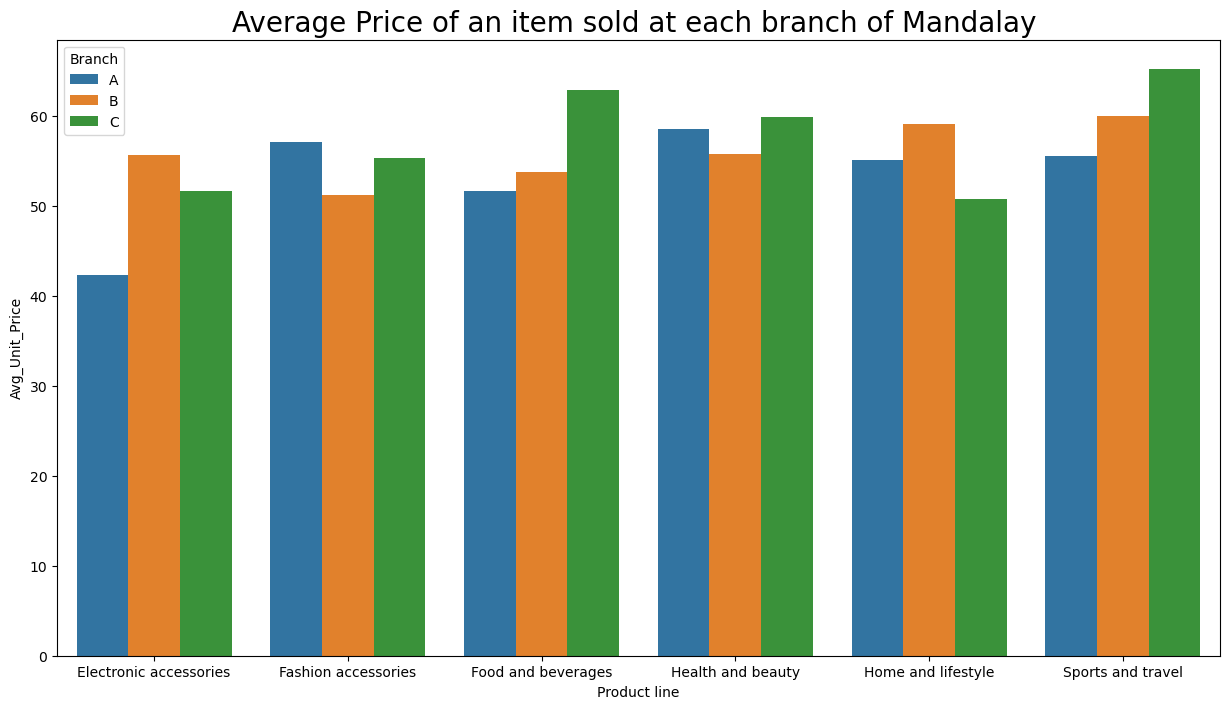

In [95]:
plt.figure(figsize=(15,8))
plt.title('Average Price of an item sold at each branch of Mandalay ', fontsize=20)
avg_price_of_Mandalay= sns.barplot(x= avg_price_Mandalay['Product line'], y= avg_price_Mandalay['Avg_Unit_Price'], hue=avg_price_Mandalay['Branch'])

### Average Price in Naypyitaw

In [96]:
avg_price_Naypyitaw_data= grouping_by_CITY_BRANCH.get_group('Naypyitaw')
avg_price_Naypyitaw_data

Invoice ID Branch       City Customer type  Gender  \
1    226-31-3081      A  Naypyitaw        Normal  Female   
5    699-14-3026      B  Naypyitaw        Normal    Male   
7    315-22-5665      C  Naypyitaw        Normal  Female   
20   300-71-4605      A  Naypyitaw        Member    Male   
34   183-56-6882      B  Naypyitaw        Member  Female   
..           ...    ...        ...           ...     ...   
983  148-41-7930      C  Naypyitaw        Normal    Male   
984  189-40-5216      A  Naypyitaw        Normal    Male   
988  267-62-7380      B  Naypyitaw        Member    Male   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      A  Naypyitaw        Normal    Male   

               Product line  Unit price  Quantity       Date      Time  \
1    Electronic accessories       15.28         5 2019-03-08  10:29:00   
5    Electronic accessories       85.39         7 2019-03-25  18:30:00   
7        Home and lifestyle       73.56        10 2019-02-24  11:38:00   
20   Electronic accessories       86.04         5 2019-02-25  11:24:00   
34       Food and beverages       99.42         4 2019-02-06  10:42:00   
..                      ...         ...       ...        ...       ...   
983       Health and beauty       99.96         7 2019-01-23  10:33:00   
984  Electronic accessories       96.37         7 2019-01-09  11:40:00   
988  Electronic accessories       82.34        10 2019-03-29  19:12:00   
994  Electronic accessories       60.95         1 2019-02-18  11:40:00   
995       Health and beauty       40.35         1 2019-01-29  13:46:00   

     Payment  Rating Month_name  Total_revenue  
1       Cash     9.6      March          76.40  
5    Ewallet     4.1      March         597.73  
7    Ewallet     8.0   February         735.60  
20   Ewallet     4.8   February         430.20  
34   Ewallet     7.5   February         397.68  
..       ...     ...        ...            ...  
983     Cash     6.1    January         699.72  
984     Cash     6.0    January         674.59  
988  Ewallet     4.3      March         823.40  
994  Ewallet     5.9   February          60.95  
995  Ewallet     6.2    January          40.35  

[328 rows x 14 columns]

In [97]:
avg_price_Naypyitaw= Avg_price_city(avg_price_Naypyitaw_data)
avg_price_Naypyitaw

Product line Branch  Avg_Unit_Price
0   Electronic accessories      A       57.365294
1   Electronic accessories      B       50.982857
2   Electronic accessories      C       60.215882
3      Fashion accessories      A       50.170476
4      Fashion accessories      B       67.704583
5      Fashion accessories      C       60.217500
6       Food and beverages      A       58.695417
7       Food and beverages      B       55.486875
8       Food and beverages      C       57.059231
9        Health and beauty      A       55.878095
10       Health and beauty      B       54.155882
11       Health and beauty      C       58.315714
12      Home and lifestyle      A       52.551538
13      Home and lifestyle      B       54.880625
14      Home and lifestyle      C       55.236250
15       Sports and travel      A       47.104286
16       Sports and travel      B       61.104000
17       Sports and travel      C       56.488125

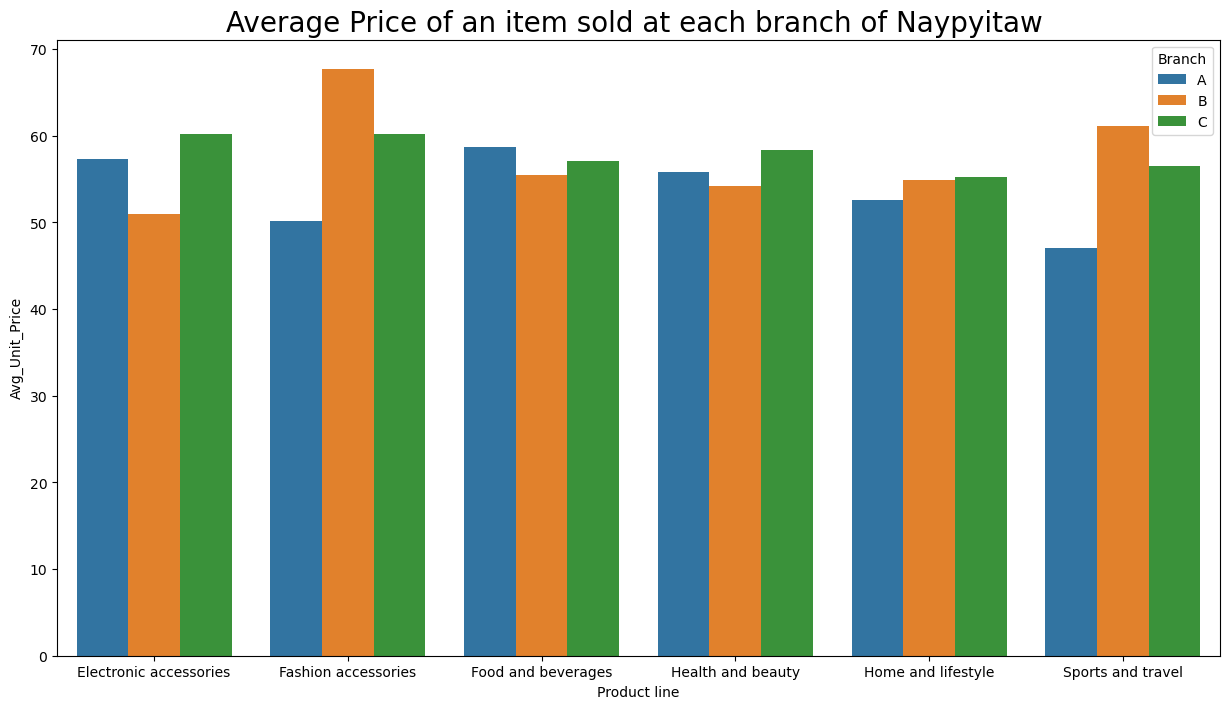

In [98]:
plt.figure(figsize=(15,8))
plt.title('Average Price of an item sold at each branch of Naypyitaw ', fontsize=20)
avg_price_of_Naypyitaw= sns.barplot(x= avg_price_Naypyitaw['Product line'], y= avg_price_Naypyitaw['Avg_Unit_Price'], hue=avg_price_Naypyitaw['Branch'])

### Average Price in Yangon

In [99]:
avg_price_Yangon_data= grouping_by_CITY_BRANCH.get_group('Yangon')
avg_price_Yangon_data

Invoice ID Branch    City Customer type  Gender            Product line  \
0    750-67-8428      A  Yangon        Member  Female       Health and beauty   
2    631-41-3108      A  Yangon        Normal    Male      Home and lifestyle   
3    123-19-1176      B  Yangon        Member    Male       Health and beauty   
4    373-73-7910      C  Yangon        Normal    Male       Sports and travel   
6    355-53-5943      A  Yangon        Member  Female  Electronic accessories   
..           ...    ...     ...           ...     ...                     ...   
990  886-18-2897      B  Yangon        Normal  Female      Food and beverages   
992  745-74-0715      C  Yangon        Normal    Male  Electronic accessories   
997  727-02-1313      A  Yangon        Member    Male      Food and beverages   
998  347-56-2442      B  Yangon        Normal    Male      Home and lifestyle   
999  849-09-3807      C  Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity       Date      Time      Payment  Rating  \
0         74.69         7 2019-01-05  13:08:00      Ewallet     9.1   
2         46.33         7 2019-03-03  13:23:00  Credit card     7.4   
3         58.22         8 2019-01-27  20:33:00      Ewallet     8.4   
4         86.31         7 2019-02-08  10:37:00      Ewallet     5.3   
6         68.84         6 2019-02-25  14:36:00      Ewallet     5.8   
..          ...       ...        ...       ...          ...     ...   
990       56.56         5 2019-03-22  19:06:00  Credit card     4.5   
992       58.03         2 2019-03-10  20:46:00      Ewallet     8.8   
997       31.84         1 2019-02-09  13:22:00         Cash     7.7   
998       65.82         1 2019-02-22  15:33:00         Cash     4.1   
999       88.34         7 2019-02-18  13:28:00         Cash     6.6   

    Month_name  Total_revenue  
0      January         522.83  
2        March         324.31  
3      January         465.76  
4     February         604.17  
6     February         413.04  
..         ...            ...  
990      March         282.80  
992      March         116.06  
997   February          31.84  
998   February          65.82  
999   February         618.38  

[340 rows x 14 columns]

In [100]:
avg_price_Yangon= Avg_price_city(avg_price_Yangon_data)
avg_price_Yangon

Product line Branch  Avg_Unit_Price
0   Electronic accessories      A       54.607647
1   Electronic accessories      B       55.653200
2   Electronic accessories      C       54.033889
3      Fashion accessories      A       48.812857
4      Fashion accessories      B       62.213889
5      Fashion accessories      C       57.208421
6       Food and beverages      A       56.977500
7       Food and beverages      B       53.268125
8       Food and beverages      C       54.394545
9        Health and beauty      A       48.096250
10       Health and beauty      B       50.880833
11       Health and beauty      C       50.706316
12      Home and lifestyle      A       55.096667
13      Home and lifestyle      B       60.719286
14      Home and lifestyle      C       46.731538
15       Sports and travel      A       65.206957
16       Sports and travel      B       46.790714
17       Sports and travel      C       51.190000

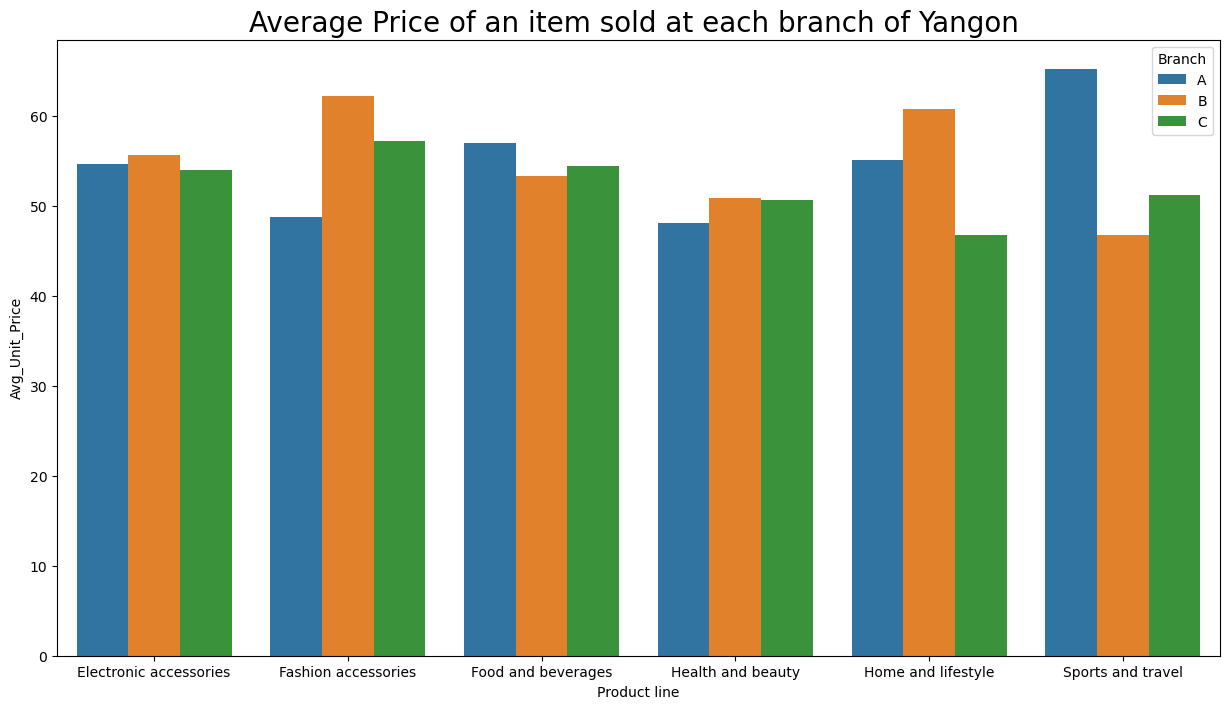

In [101]:
plt.figure(figsize=(15,8))
plt.title('Average Price of an item sold at each branch of Yangon ', fontsize=20)
avg_price_of_Yangon= sns.barplot(x= avg_price_Yangon['Product line'], y= avg_price_Yangon['Avg_Unit_Price'], hue=avg_price_Yangon['Branch'])